# E-commerce Analytics with Machine Learning: A Multi-Model Approach to Sales Forecasting, Customer Behavior, and Logistics
### Connecting transaction records to actionable insights on sales performance, purchasing patterns, and delivery processes

## 1. Introduction & Dataset Overview

This project explores anonymized e-commerce order data from the **Olist Store**, one of Brazil’s leading online marketplaces [1]. It contains approximately **100,000 orders placed between 2016 and 2018** across multiple Brazilian marketplaces. It offers a complete view of the customer journey, including:

- Order status, pricing and payment details  
- Shipping/freight performance and estimated delivery dates  
- Customer location and product attributes  
- Customer satisfaction scores and written reviews  
- A companion geolocation table that maps Brazilian ZIP codes to latitude/longitude  

To protect privacy, all data has been **anonymized**. In particular, any company or partner names mentioned in customer reviews have been replaced with the names of Great Houses from *Game of Thrones*.

### About Olist

Olist is the largest department store on Brazilian marketplaces. It connects small businesses across the country to major sales channels through a single contract, while handling logistics with its delivery partners. After each purchase, customers are invited to rate their experience and leave feedback, providing the basis for the review data.

### Database Schema Diagram

The dataset is organized into multiple relational tables that connect through key identifiers such as `order_id`, `customer_id`, `product_id`, `seller_id`, and `zip_code_prefix`. This structure allows for flexible analysis across orders, products, customers, sellers, payments, logistics, and customer reviews.

<div align="center">
<img src="dbschema.png" width="1000", height="800">
</div>

At the center of the schema there are two tables, the **Orders** table (`olist_orders_dataset`), which connects to:  

- **Payments** (`olist_order_payments_dataset`) via `order_id`  
- **Reviews** (`olist_order_reviews_dataset`) via `order_id`  
- **Customers** (`olist_customers_dataset`) via `customer_id`  

and the **Items** table (`olist_order_items_dataset`), which connects to:  

- **Orders** (`olist_orders_dataset`) via `order_id`  
- **Products** (`olist_products_dataset`) via `product_id`  
- **Sellers** (`olist_sellers_dataset`) via `seller_id`  

This relational design makes it possible to explore the entire customer journey, from purchase and payment to delivery and post-sale feedback.

---

### Project Scope & Goals

**Primary Goal**

- Develop a data-driven framework to enhance delivery time estimates and support operational planning. Specifically, by **refining estimated delivery times** using an XGBoost model with historical order and customer data, plus insights from customer reviews via **text analysis**. In parallel, forecast daily order volumes with Prophet, segment customers using KMeans based on spending, engagement, and satisfaction, and combine these segments with forecasted volumes to **estimate monthly order volumes per segment**, providing accurate delivery projections and actionable insights.

---

**Secondary Objectives**

- Conduct exploratory data analysis (EDA) to examine datasets, understand relationships, and identify missing or inconsistent data.  
- Perform data preprocessing, including type conversions, dataset merging, and handling missing or anomalous values.  
- Develop a forecasting model using Prophet to predict daily order volumes for 2018–2019, supporting operational planning and decision-making.  
- Apply KMeans clustering to segment customers based on behavior, incorporating spending habits, engagement, and satisfaction (total spent, order count, and average review score).  
- Integrate forecasted order volumes with customer segments to estimate monthly order volumes per segment for the following year.  
- Implement a sentiment analysis pipeline using a multilingual transformer model (XLM-RoBERTa) to analyze Portuguese-language customer reviews.  
- Build an XGBoost regression model to improve delivery time estimations by combining historical orders data, purchase patterns, customer segmentation, and sentiment analysis outputs for enhanced predictive accuracy.

---

**References**

[1] Olist. (2018). *Brazilian E-Commerce Public Dataset by Olist* [Data set]. Kaggle. https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

### Notebook Structure

Below is the roadmap this notebook will follow:

1. [Introduction & Dataset Overview](#1.-Introduction-&-Dataset-Overview)  
2. [Initial Data Loading and Exploration](#2.-Initial-Data-Loading-and-Exploration)  
   - [2.1. Load Data Files and Necessary Libraries](#2.1.-Load-Data-Files-and-Necessary-Libraries)  
   - [2.2. Initial Data Inspection](#2.2.-Initial-Data-Inspection)  
3. [Data Cleaning & Feature Engineering](#3.-Data-Cleaning-&-Feature-Engineering)  
   - [3.1. Standardizing Delivery Metrics and Deriving Time-Based Features](#3.1.-Standardizing-Delivery-Metrics-and-Deriving-Time-Based-Features)  
   - [3.2. Constructing Customer Behavioral Features for Clustering](#3.2.-Constructing-Customer-Behavioral-Features-for-Clustering)  
   - [3.3. Engineering Review-Based Features for Text Classification and Delivery Estimation](#3.3.-Engineering-Review-Based-Features-for-Text-Classification-and-Delivery-Estimation) 
4. [Time Series Forecasting: Predicting Daily Order Volumes with Prophet](#4.-Time-Series-Forecasting:-Predicting-Daily-Order-Volumes-with-Prophet)  
   - [4.1. Preparing Time Series Data: Daily Order Aggregation](#4.1.-Preparing-Time-Series-Data:-Daily-Order-Aggregation)  
   - [4.2. Building and Training the Prophet Model for Order Forecasting](#4.2.-Building-and-Training-the-Prophet-Model-for-Order-Forecasting)  
   - [4.3. Model Evaluation and Future Order Volume Predictions](#4.3.-Model-Evaluation-and-Future-Order-Volume-Predictions)  
5. [Behavioral Customer Segmentation via K-Means](#5.-Behavioral-Customer-Segmentation-via-K-Means)  
   - [5.1. Feature Standardization: Total Spent, Order Count, and Review Score](#5.1.-Feature-Standardization:-Total-Spent,-Order-Count,-and-Review-Score)  
   - [5.2. Determining K: Cluster Analysis and Validation Metrics](#5.2.-Determining-K:-Cluster-Analysis-and-Validation-Metrics)  
   - [5.3. K-Means Execution: Creating Customer Segments](#5.3.-K-Means-Execution:-Creating-Customer-Segments)  
   - [5.4. Cluster Interpretation: Behavioral Insights and Segment Properties](#5.4.-Cluster-Interpretation:-Behavioral-Insights-and-Segment-Properties)
6. [Integrating Predictive Analytics: Customer Segments with Order Forecasts](#6.-Integrating-Predictive-Analytics:-Customer-Segments-with-Order-Forecasts)  
   - [6.1. Creating a Unified View: Merging Forecasts with Customer Segments](#6.1.-Creating-a-Unified-View:-Merging-Forecasts-with-Customer-Segments)  
   - [6.2. Strategic Planning: Projected Monthly Order Distribution Across Segments](#6.2.-Strategic-Planning:-Projected-Monthly-Order-Distribution-Across-Segments)  
7. [Sentiment Analysis: Customer Review Insights with Transformers](#7.-Sentiment-Analysis:-Customer-Review-Insights-with-Transformers)  
   - [7.1. Multilingual Model Implementation: XLM-RoBERTa Pipeline](#7.1.-Multilingual-Model-Implementation:-XLM-RoBERTa-Pipeline)  
   - [7.2. Feature Integration: Incorporating Sentiment into Predictive Models](#7.2.-Feature-Integration:-Incorporating-Sentiment-into-Predictive-Models)  
8. [XGBoost-Powered Hybrid System for Delivery Time Prediction](#8.-XGBoost-Powered-Hybrid-System-for-Delivery-Time-Prediction)  
   - [8.1. Advanced Feature Engineering for Enhanced Model Performance](#8.1.-Advanced-Feature-Engineering-for-Enhanced-Model-Performance)  
   - [8.2. Exploratory Data Analysis: Investigating Feature Relationships for Delivery Time Prediction](#8.2.-Exploratory-Data-Analysis:-Investigating-Feature-Relationships-for-Delivery-Time-Prediction)  
   - [8.3. XGBoost Regression and Hyperparameter Optimization Using Optuna](#8.3.-XGBoost-Regression-and-Hyperparameter-Optimization-Using-Optuna)  
   - [8.4. System Evaluation: Assessing Hybrid Model Accuracy and Reliability](#8.4.-System-Evaluation:-Assessing-Hybrid-Model-Accuracy-and-Reliability)
   - [8.5. Feature Importance: Understanding Most Influential Features](8.5.-Feature-Importance:-Understanding-Most-Influential-Features)
9. [Strategic Insights and Business Impact](#9.-Strategic-Insights-and-Business-Impact)  
   - [9.1. Key Analytical Findings: Multi-Model System Performance](#9.1.-Key-Analytical-Findings:-Multi-Model-System-Performance)  
   - [9.2. Actionable Recommendations: Logistics and Customer Experience Improvements](#9.2.-Actionable-Recommendations:-Logistics-and-Customer-Experience-Improvements)  
   - [9.3. Project Limitations and Future Enhancement Opportunities](#9.3.-Project-Limitations-and-Future-Enhancement-Opportunities)
   - [9.4. Final Remarks](#9.4.-Final-Remarks)

## 2. Initial Data Loading and Exploration

In this section, we load the necessary modules and files for the project. We then perform an initial exploration of the main tables to understand their structure, relationships within the schema, and key characteristics. Additionally, we examine unique values, missing data and data types across all relevant tables to ensure a comprehensive understanding of the dataset.

### 2.1. Load Data Files and Necessary Libraries

We begin by importing the main libraries required for this project, including those for numerical computation and data manipulation (Numpy and Pandas), visualization (Matplotlib and Seaborn), machine learning (scikit-learn and XGBoost), model optimization (Optuna), time series forecasting (Prophet), and natural language processing (Transformers from Hugging Face).

In [1]:
# Standard library imports
import os
import logging
import warnings
from IPython.display import display, HTML

# Numerical and data manipulation
import numpy as np
import pandas as pd

# Statistics
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Utilities and model optimization
import joblib
import optuna
from optuna.integration import XGBoostPruningCallback

# Time series forecasting (Prophet)
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

# Gradient boosting (XGBoost)
from xgboost import XGBRegressor
from xgboost import plot_importance

# Natural Language Processing (Transformers)
from transformers import pipeline

# Scikit-learn imports
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Filter warnings and configure pandas
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

Next, we load the core datasets required for our analysis by reading the CSV files using the pandas library

In [2]:
# Load the core datasets
customers = pd.read_csv("olist_customers_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
orders = pd.read_csv("olist_orders_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")

### 2.2. Initial Data Inspection

We start with an initial exploration of all datasets to examine their structure, column types, missing and unique values, and the interrelationships among the tables.

#### Customers

The `customers` dataset contains information related to each customer, including `customer_id` for linking to the orders dataset, `customer_unique_id` as a unique identifier for each customer, `customer_zip_code_prefix` representing the customer’s ZIP code, `customer_city` indicating the city, and `customer_state` specifying the state of residence.


In [3]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
55332,319a71d1061c0bff9af2fd98eb3e8e14,49bea5fd4f094025d02b301aad47d5ca,13710,tambau,SP
89812,c3189548cd373b2d1f4d190e5008fe7b,f3b9cd7ebcd910bb1183d98ba10713ab,99260,casca,RS
33342,e4db39923459dcae0bb7ae891644f656,651cdbdba118c3e569357142e032f502,31525,belo horizonte,MG
68010,bc07e86d2726e37a4ac4284e93f89d51,eb5301eb7c5e2cb69a7baa5909173f1c,75080,anapolis,GO
84146,5c49d0bcb0f397a3a5dec5512755f848,c4bc1ea5188b1d194cddfd732e90bff1,88385,penha,SC


Overall, the `customers` table contains 99,441 records with no missing values. It includes both categorical (`object`) and numerical (`int64`) data types. The dataset provides customer identifiers, ZIP code prefixes, and geographic information such as city and state. There are 96,096 unique customers, 14,994 distinct ZIP code prefixes, 4,119 cities, and 27 states represented in the data.

In [4]:
# Create a dataframe to display column names, number
# of missing values, unique values and data types
customers_info = pd.DataFrame({
    'Columns': customers.columns,
    'Missing Values': len(customers) - customers.notna().sum(),
    'Unique values': customers.nunique(),
    'Data type': customers.dtypes
}).reset_index(drop=True)


# Display customers information
display(HTML("<b style='padding-left: 150px;'>Customers Information</b>"))
display(customers_info)

,Columns,Missing Values,Unique values,Data type
0,customer_id,0,99441,object
1,customer_unique_id,0,96096,object
2,customer_zip_code_prefix,0,14994,int64
3,customer_city,0,4119,object
4,customer_state,0,27,object


#### Sellers

The `sellers` dataset contains information about individual sellers participating in the marketplace. It includes `seller_id` as a unique identifier for each seller, `seller_zip_code_prefix` representing the seller’s ZIP code, `seller_city` indicating the city where the seller is located, and `seller_state` specifying the state of operation.

In [5]:
sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1274,b98b715fe9e276204e2a3464f48cd796,3827,sao paulo,SP
1905,296729ffb9b684050dd24836dac4494a,80240,curitiba,SP
504,62c50c1af4dfdc4149d25c5222043d39,4782,sao paulo,SP
2249,88ef59b51bdaa941d10a853429f2b6ce,83280,guaratuba,PR
1025,ef2fbc2b607d8492bcffe657a4645434,20051,rio de janeiro,RJ


In general, the `sellers` table contains 3,095 records with no missing values. It includes both categorical (`object`) and numerical (`int64`) data types. The dataset provides seller identifiers, ZIP code prefixes, and geographic information such as city and state. There are 3,095 unique sellers, 2,246 distinct ZIP code prefixes, 611 cities, and 23 states represented in the data.

In [6]:
# Create a dataframe to display column names, number
# of missing values, unique values and data types
sellers_info = pd.DataFrame({
    'Columns': sellers.columns,
    'Missing Values': len(sellers) - sellers.notna().sum(),
    'Unique values': sellers.nunique(),
    'Data type': sellers.dtypes
}).reset_index(drop=True)


# Display sellers information
display(HTML("<b style='padding-left: 165px;'>Sellers Information</b>"))
display(sellers_info)

,Columns,Missing Values,Unique values,Data type
0,seller_id,0,3095,object
1,seller_zip_code_prefix,0,2246,int64
2,seller_city,0,611,object
3,seller_state,0,23,object


#### Items

The `items` dataset contains detailed information about each item included in a customer’s order. It includes `order_id` linking the item to the corresponding order, `order_item_id` representing the total number of the same item included in the order, `product_id` identifying the purchased product, and `seller_id` indicating which seller fulfilled the item. The dataset also contains `shipping_limit_date`, which specifies the latest date by which the seller must ship the item, along with the `price` of the product and the `freight_value` representing the shipping cost charged to the customer.

In [7]:
items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
7271,107b6dd80460768e617562eb52b4b9a9,1,6c3effec7c8ddba466d4f03f982c7aa3,37515688008a7a40ac93e3b2e4ab203f,2018-03-07 09:09:28,32.50,11.85
69169,9df68f730ca4706111e3d06332c5ce14,1,33fca9d59532dd4c191217a979346ab9,fe2032dab1a61af8794248c8196565c9,2017-07-06 14:23:47,248.00,13.24
110707,fb8bdcd57010a0af8738fad1e866b8b9,1,169a5b175b7c1727d5654db38acda924,cb0b3bcf14e0a709df412a99424a59d7,2018-04-20 19:11:42,240.00,24.18
47504,6bf83087dc6176ce753398bf1a976f0b,6,d5991653e037ccb7af6ed7d94246b249,25c5c91f63607446a97b143d2d535d31,2017-10-23 16:07:48,137.90,25.91
54609,7c2074d65188839dfee681e7bb264365,1,4d8de1d60513d0a0d3665dbde171be1c,bb5bd94c8f59cc050072d2930c869cac,2017-10-19 12:26:40,49.99,7.78


In addition, the `items` table contains 98,666 records with no missing values. It includes both categorical (`object`) and numerical (`int64`, `float64`) data types. The dataset provides order identifiers, number of same item within orders, product and seller identifiers, shipping deadlines, and financial information such as price and freight value. There are 98,666 unique orders, 21 different numbers of same item per order, 32,951 unique products, 3,095 sellers, 93,318 unique shipping limit dates, 5,968 distinct prices, and 6,999 freight values represented in the data.

In [8]:
# Create a dataframe to display column names, number
# of missing values, unique values and data types
items_info = pd.DataFrame({
    'Columns': items.columns,
    'Missing Values': len(items)-items.notna().sum(),
    'Unique values': items.nunique(),
    'Data type': items.dtypes
}).reset_index(drop=True)


# Display items information
display(HTML("<b style='padding-left: 165px;'>Items Information</b>"))
display(items_info)

,Columns,Missing Values,Unique values,Data type
0,order_id,0,98666,object
1,order_item_id,0,21,int64
2,product_id,0,32951,object
3,seller_id,0,3095,object
4,shipping_limit_date,0,93318,object
5,price,0,5968,float64
6,freight_value,0,6999,float64


#### Geolocation

The `geolocation` dataset provides geographic information associated with ZIP code prefixes. It includes `geolocation_zip_code_prefix` representing the ZIP code area, `geolocation_lat` and `geolocation_lng` indicating the latitude and longitude coordinates, respectively, `geolocation_city` specifying the city name, and `geolocation_state` denoting the corresponding state. This dataset can be used to map customer and seller locations or to calculate distances between them.

In [9]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
206694,8461,-23.561259,-46.402277,sao paulo,SP
475707,24310,-22.908656,-43.065322,niteroi,RJ
866207,83900,-25.862526,-50.382900,sao mateus do sul,PR
92101,4474,-23.700525,-46.644732,sao paulo,SP
423921,21070,-22.849236,-43.289728,rio de janeiro,RJ


Overall, the `geolocation` table contains 717,903 records with no missing values. It includes both categorical (`object`) and numerical (`int64`, `float64`) data types. The dataset provides geographic information associated with ZIP code prefixes, including latitude, longitude, city, and state. There are 19,015 distinct ZIP code prefixes, 717,360 unique latitude values, 717,613 unique longitude values, 8,011 cities, and 27 states represented in the data.

In [10]:
# Create a dataframe to display column names, number
# of missing values, unique values and data types
geolocation_info = pd.DataFrame({
    'Columns': geolocation.columns,
    'Missing Values': len(geolocation)-geolocation.notna().sum(),
    'Unique values': geolocation.nunique(),
    'Data type': geolocation.dtypes
}).reset_index(drop=True)


# Display geolocation information
display(HTML("<b style='padding-left: 165px;'>Geolocation Information</b>"))
display(geolocation_info)

,Columns,Missing Values,Unique values,Data type
0,geolocation_zip_code_prefix,0,19015,int64
1,geolocation_lat,0,717360,float64
2,geolocation_lng,0,717613,float64
3,geolocation_city,0,8011,object
4,geolocation_state,0,27,object


#### Orders

The `orders` dataset contains information about each customer order. It includes `order_id` as a unique identifier, `customer_id` linking the order to a customer, and `order_status` indicating the current state of the order (e.g., delivered, shipped, canceled). The dataframe also provides timestamps for key events: `order_purchase_timestamp` when the order was placed, `order_approved_at` when the payment was approved, `order_delivered_carrier_date` when the order was handed to the shipping carrier, `order_delivered_customer_date` when the customer received the order, and `order_estimated_delivery_date` representing the initially estimated delivery date.

In [11]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
21216,e3bcb51f9cf80e278397c1c56d827285,9e9c658318294b4563a62a0b6b30a0bc,delivered,2017-12-08 22:59:56,2017-12-08 23:12:20,2017-12-14 01:07:27,2017-12-20 15:07:40,2018-01-08 00:00:00
4245,078e048ccc8dc8b449dedc064b860b0f,a599bcb4e597bbc3a7b1a1f6e39988ee,delivered,2017-06-22 19:29:40,2017-06-22 19:42:44,2017-06-26 17:21:57,2017-07-10 10:57:56,2017-07-05 00:00:00
60152,2ffc1bd0212c5ba712e1da786b4328c2,a40bcc58beb1ce296a0b7ad7cb0ec0b6,delivered,2017-07-28 21:14:50,2017-08-02 08:32:33,2017-08-01 18:39:25,2017-08-15 22:09:41,2017-08-23 00:00:00
64046,5409caeb5a9baefa9e8316e7854e532f,5774503f5dbbcd09cb88a1fa32f4f88d,delivered,2018-06-30 12:16:02,2018-07-05 16:04:21,2018-07-03 14:54:00,2018-07-06 10:48:39,2018-07-26 00:00:00
5310,35ca13a1178f68d06aeb72c659c67caf,532ba8d37f21feb6c733fe3847aae08c,delivered,2018-05-14 17:21:38,2018-05-16 03:33:49,2018-05-16 14:45:00,2018-05-22 16:32:45,2018-06-01 00:00:00


In sum, the `orders` table contains 99,441 records with some missing values in certain columns. It includes both categorical (`object`) and timestamp-like (`object`) data types. The dataset provides order identifiers, customer identifiers, order status, and key timestamps for the order process, including purchase, approval, delivery to the carrier, delivery to the customer, and estimated delivery dates. There are 99,441 unique orders and customers, 8 distinct order statuses, 98,875 unique purchase timestamps, 90,733 approved orders, 81,018 carrier delivery dates, 95,664 customer delivery dates, and 459 estimated delivery dates represented in the data.

In [12]:
# Create a dataframe to display column names, number
# of missing values, unique values and data types
orders_info = pd.DataFrame({
    'Columns': orders.columns,
    'Missing Values': len(orders)-orders.notna().sum(),
    'Unique values': orders.nunique(),
    'Data type': orders.dtypes
}).reset_index(drop=True)

# Display orders information
display(HTML("<b style='padding-left: 185px;'>Orders Information</b>"))
display(orders_info)

,Columns,Missing Values,Unique values,Data type
0,order_id,0,99441,object
1,customer_id,0,99441,object
2,order_status,0,8,object
3,order_purchase_timestamp,0,98875,object
4,order_approved_at,160,90733,object
5,order_delivered_carrier_date,1783,81018,object
6,order_delivered_customer_date,2965,95664,object
7,order_estimated_delivery_date,0,459,object


#### Payments

The `payments` dataset contains information about the payment transactions for each order. It includes `order_id` linking the payment to a specific order, `payment_sequential` indicating the sequence number of the payment for orders with multiple transactions, `payment_type` specifying the method of payment (e.g., credit card, boleto), `payment_installments` showing the number of installments used for the payment, and `payment_value` representing the total amount paid in that transaction.

In [13]:
payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
101958,f3a47ba087f05d39a74ed1b653f0be1b,1,credit_card,2,134.55
27828,c4566096644e484021e16258c06ccb4d,1,boleto,1,52.62
52959,61b199f09f9de7776b875cce7c71e649,1,credit_card,5,210.93
23027,ca1e3b1d345a9808d206c244778976eb,1,credit_card,10,144.54
70284,ca5f84c834ef797682187652a17cf463,1,boleto,1,47.68


In general, the `payments` table contains 99,440 records with no missing values. It includes both categorical (`object`) and numerical (`int64`, `float64`) data types. The dataset provides payment information for each order, including order identifiers, payment sequence numbers, payment types, number of installments, and payment amounts. There are 99,440 unique orders, 29 distinct payment sequences, 5 payment types, 24 installment options, and 29,077 unique payment values represented in the data.

In [14]:
# Create a dataframe to display column names, number
# of missing values, unique values and data types
payments_info = pd.DataFrame({
    'Columns': payments.columns,
    'Missing Values': len(payments)-payments.notna().sum(),
    'Unique values': payments.nunique(),
    'Data type': payments.dtypes
}).reset_index(drop=True)


# Display payments information
display(HTML("<b style='padding-left: 150px;'>Payments Information</b>"))
display(payments_info)

,Columns,Missing Values,Unique values,Data type
0,order_id,0,99440,object
1,payment_sequential,0,29,int64
2,payment_type,0,5,object
3,payment_installments,0,24,int64
4,payment_value,0,29077,float64


#### Reviews

The `reviews` dataset contains customer feedback for each order. It includes `review_id` as a unique identifier for the review, `order_id` linking the review to a specific order, and `review_score` representing the customer’s rating (on a scale from 1 to 5). It also contains optional `review_comment_title` and `review_comment_message` fields for textual feedback, `review_creation_date` indicating when the review was submitted, and `review_answer_timestamp` showing when the seller responded to the review, if applicable.

In [15]:
reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
63373,4fa49d7e9343841d7ca0288f892a1dc7,4d3889f52fc68c6517bc1c164c35ae49,5,NaN,NaN,2018-06-22 00:00:00,2018-06-23 10:44:25
25116,150b50330ba9dc18e8a0ede90b805dc9,ae65eec5243045a7ec6e0bffcb14c111,3,NaN,NaN,2018-01-06 00:00:00,2018-01-09 13:28:50
9317,d02809d5b443aea6c77b82f348547b10,3c22fe6868c666f6a4edc2c5456c26aa,1,NaN,ainda nao recebi o produto estou no aguardo,2017-12-22 00:00:00,2017-12-22 17:02:53
58313,8591cc727fc69e79e649720a1e16f4b4,180bb1b8686d6679359207ce3b1f5885,1,NaN,NaN,2018-02-06 00:00:00,2018-02-07 09:34:50
85422,c111252cff36b973df393947d63a5b19,d1f789756b59a9fb40b3becadeac90e4,1,NaN,NaN,2017-12-15 00:00:00,2017-12-18 12:47:03


In addition, the `reviews` table contains 98,410 records with some missing values in certain columns. It includes both categorical (`object`) and numerical (`int64`) data types. The dataset provides customer feedback for each order, including review identifiers, order identifiers, review scores, optional review titles and messages, creation dates, and timestamps of seller responses. There are 98,410 unique reviews, 98,673 unique orders, 5 distinct review scores, 4,527 review titles, 36,159 review messages, 636 review creation dates, and 98,248 answer timestamps represented in the data.

In [16]:
# Create a dataframe to display column names, number
# of missing values, unique values and data types
reviews_info = pd.DataFrame({
    'Columns': reviews.columns,
    'Missing Values': len(reviews)-reviews.notna().sum(),
    'Unique values': reviews.nunique(),
    'Data type': reviews.dtypes
}).reset_index(drop=True)


# Display reviews information
display(HTML("<b style='padding-left: 165px;'>Reviews Information</b>"))
display(reviews_info)

,Columns,Missing Values,Unique values,Data type
0,review_id,0,98410,object
1,order_id,0,98673,object
2,review_score,0,5,int64
3,review_comment_title,87656,4527,object
4,review_comment_message,58247,36159,object
5,review_creation_date,0,636,object
6,review_answer_timestamp,0,98248,object


Having examined the main tables and reviewed their columns, keys, unique and missing values, and data types, we can now proceed with the data cleaning process. This preliminary exploration allowed us to identify structural inconsistencies, missing or duplicated records, and potential data quality issues, ensuring that the dataset is consistent and reliable before further analysis.

## 3. Data Cleaning & Feature Engineering

This section focuses on transforming the raw dataset into a clean and structured format suitable for analysis and modeling. The process includes handling missing or inconsistent values to maintain data integrity, creating informative features that capture meaningful patterns, and merging multiple tables into a single, unified dataset. The main goal is to improve data quality and extract features that enhance the performance and interpretability of the models used to forecast next year’s orders, segment customer behavior, and estimate updated delivery times. The feature engineering process was iterative, with new features being added and refined over several attempts to achieve better results.

### 3.1. Standardizing Delivery Metrics and Deriving Time-Based Features
First, we focus on orders that were successfully delivered to ensure consistency in the analysis. We first extract the **actual delivery time in days**, defined as the period between the purchase date and the delivery date. Since raw timestamps cannot be directly used as model inputs, we collect several **time-based features** from the orders dataset to make the data suitable for machine learning models.  

These derived features include:  

- **Estimated delivery time (days):** from purchase to estimated delivery
- **Approval time (hours):** from purchase to order approval  
- **Approval to estimated delivery time (days):** from order approval to estimated delivery  
- **Carrier delivery time (days):** from purchase to carrier pickup  
- **Carrier to estimated delivery time (days):** from carrier pickup to estimated delivery  
- **Approval to carrier time (hours):** from order approval to carrier pickup  

This process standardizes all relevant temporal data and extracts interpretable features that capture the dynamics of the delivery process, forming a robust foundation for forecasting tasks and estimating new delivery times.

In [17]:
# Focus on orders actually delivered
orders_clean = orders.dropna(subset=["order_delivered_customer_date"]).copy()

# Extract delivery time in days
orders_clean['order_purchase_timestamp'] = pd.to_datetime(
    orders_clean['order_purchase_timestamp']
)
orders_clean['order_delivered_customer_date'] = pd.to_datetime(
    orders_clean['order_delivered_customer_date']
)
orders_clean['delivery_time_days'] = (
    orders_clean['order_delivered_customer_date'] - 
    orders_clean['order_purchase_timestamp']
).dt.days

# Extract estimated delivery time in days
orders_clean['order_estimated_delivery_date'] = pd.to_datetime(
    orders_clean['order_estimated_delivery_date']
)
orders_clean['estimated_delivery_time_days'] = (
    orders_clean['order_estimated_delivery_date'] - 
    orders_clean['order_purchase_timestamp']
).dt.days

# Extract time for order approval in hours
orders_clean['order_approved_at'] = pd.to_datetime(
    orders_clean['order_approved_at']
)
orders_clean['approval_time_hours'] = (
    orders_clean['order_approved_at'] - 
    orders_clean['order_purchase_timestamp']
).dt.total_seconds() / 3600  # Convert seconds to hours

# Extract time from order approval to estimated delivery in days
orders_clean['approval_estimated_delivery_time_days'] = (
    orders_clean['order_estimated_delivery_date'] - 
    orders_clean['order_approved_at']
).dt.days

# Extract time for carrier delivery in days
orders_clean['order_delivered_carrier_date'] = pd.to_datetime(
    orders_clean['order_delivered_carrier_date']
)
orders_clean['carrier_delivery_time_days'] = (
    orders_clean['order_delivered_carrier_date'] - 
    orders_clean['order_purchase_timestamp']
).dt.days


# Extract time from carrier to customer estimated delivery in days
orders_clean['carrier_estimated_delivery_time_days'] = (
    orders_clean['order_estimated_delivery_date'] - 
    orders_clean['order_delivered_carrier_date']
).dt.days

# Extract time from approval to carrier delivery in hours
orders_clean['approval_carrier_time_hours'] = (
    orders_clean['order_delivered_carrier_date'] - 
    orders_clean['order_approved_at']
).dt.total_seconds() / 3600  # Convert seconds to hours

orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 99440
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   order_id                               96476 non-null  object        
 1   customer_id                            96476 non-null  object        
 2   order_status                           96476 non-null  object        
 3   order_purchase_timestamp               96476 non-null  datetime64[ns]
 4   order_approved_at                      96462 non-null  datetime64[ns]
 5   order_delivered_carrier_date           96475 non-null  datetime64[ns]
 6   order_delivered_customer_date          96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date          96476 non-null  datetime64[ns]
 8   delivery_time_days                     96476 non-null  int64         
 9   estimated_delivery_time_days           96476 non-null  int64      

### 3.2. Constructing Customer Behavioral Features for Clustering  

Then, customer-level behavioral features are derived by merging orders, payment, and review datasets to capture purchasing activity and satisfaction patterns.  Each customer’s unique identifier is linked to their corresponding transactions, payments, and feedback, creating a unified behavioral profile.  

The aggregated features include:  
- **Total spent:** cumulative value of all completed orders.  
- **Order count:** number of unique orders per customer, reflecting purchase frequency.  
- **Average review score:** mean of review ratings, indicating customer satisfaction.  

These variables provide a concise representation of customer engagement and purchasing tendencies, forming the basis for subsequent clustering and segmentation analysis.

In [18]:
# Merge customer unique identifier with orders
customers_merged = customers[['customer_unique_id', 'customer_id']].merge(
    orders_clean[['customer_id', 'order_id']],
    on='customer_id',
    how='left'
)

# Merge orders with payments
customers_merged = customers_merged.merge(
    payments[['order_id', 'payment_value']],
    on='order_id',
    how='left'
)
# Merge with review score
customers_merged = customers_merged.merge(
    reviews[['order_id', 'review_score']],
    on='order_id',
    how='left'
)

# Sum payments per customer and mean review score
customer_behavior = customers_merged.groupby('customer_unique_id').agg(
    total_spent=('payment_value', 'sum'),
    order_count=('order_id', 'nunique'),
    avg_review_score=('review_score', 'mean')
).reset_index().round(2)

# Recover customer_id, useful for further joins
customer_behavior = customers[["customer_unique_id", 'customer_id']].merge(
    customer_behavior,
    on='customer_unique_id',
    how='left'
)

customer_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  99441 non-null  object 
 1   customer_id         99441 non-null  object 
 2   total_spent         99441 non-null  float64
 3   order_count         99441 non-null  int64  
 4   avg_review_score    96069 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.8+ MB


### 3.3. Construction of Review-Based Features for Text Classification and Delivery Estimation  

Next, review-based features are constructed by combining customer reviews with order and behavioral data. This integration enables the analysis of factors that influence customer satisfaction and delivery performance. Each review is matched to its corresponding order and customer, incorporating temporal and behavioral attributes that can be used as predictors in regression and classification models.  

The resulting dataset includes variables such as:  
- **Actual and estimated delivery times:** measure delivery accuracy and fulfillment efficiency.  
- **Approval and carrier processing times:** represent intermediate stages in the delivery workflow.  
- **Customer spending and activity metrics:** indicate purchasing frequency and engagement.  

Missing values in key variables are imputed using median replacement to preserve consistency across the dataset. This constructed dataset provides a comprehensive view of how operational and behavioral factors relate to customer feedback, supporting both NLP-based review analysis and delivery time prediction models.

In [19]:
# Keep only reviews and orders ids and review score
reviews_data = reviews[['review_id', 'order_id', 'review_score']].copy()

# Merge to get customer_id, order purchase and delivery time
reviews_data = reviews_data.merge(
    orders_clean[[
        'order_id', 
        'customer_id', 
        'order_purchase_timestamp', 
        'delivery_time_days',
        'estimated_delivery_time_days',
        'approval_time_hours',
        'approval_estimated_delivery_time_days',
        'carrier_delivery_time_days',
        'carrier_estimated_delivery_time_days',
        'approval_carrier_time_hours'
    ]], 
    on='order_id', 
    how='left'
)

# Merge to get the customer behavior features
reviews_data = customer_behavior.merge(
    reviews_data,
    on='customer_id',
    how='left'
)

# Handle remaining missing values
reviews_data['estimated_delivery_time_days'].fillna(
    reviews_data['estimated_delivery_time_days'].median(), 
    inplace=True
)
reviews_data['avg_review_score'].fillna(
    reviews_data['avg_review_score'].median(),
    inplace=True
)
reviews_data['avg_review_score'].fillna(
    reviews_data['avg_review_score'].median(),
    inplace=True
)

reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99970 entries, 0 to 99969
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customer_unique_id                     99970 non-null  object        
 1   customer_id                            99970 non-null  object        
 2   total_spent                            99970 non-null  float64       
 3   order_count                            99970 non-null  int64         
 4   avg_review_score                       99970 non-null  float64       
 5   review_id                              96359 non-null  object        
 6   order_id                               96359 non-null  object        
 7   review_score                           96359 non-null  float64       
 8   order_purchase_timestamp               96359 non-null  datetime64[ns]
 9   delivery_time_days                     96359 non-null  float6

## 4. Time Series Forecasting: Predicting Daily Order Volumes with Prophet

In this section, Meta’s **Prophet** model is applied to forecast daily order volumes using historical purchase data. The time series is first aggregated by day and formatted to meet Prophet’s input requirements, allowing the model to effectively capture underlying trends, seasonality, and holiday effects. Model performance is then assessed using standard evaluation metrics and visualizations, and the final trained model is used to predict future order volumes, supporting more accurate demand forecasting and operational planning.

### 4.1. Preparing Time Series Data: Daily Order Aggregation  

As a first step, we convert historical order data into a daily time series for *Prophet*. Then, we sample orders by purchase timestamp to get total daily orders, creating a continuous timeline of demand and format the DataFrame with **`ds`** as the date and **`y`** as the daily order count. We split the data using a temporal cutoff on **June 1, 2018**, keeping the last three months for testing. This sets up a clean time series for training and evaluating the model.


In [20]:
# Create a daily order count timeline
daily_orders = orders_clean.set_index('order_purchase_timestamp').resample('D').size()

daily_orders = daily_orders.reset_index()
daily_orders.columns = ['ds', 'y'] # Prophet requires this naming convention

# Create mask to use data up to 2018-05-31 for training
test_cutoff = '2018-06-01'
test_mask = daily_orders['ds'] >= test_cutoff

train_mask = ~test_mask
prophet_train = daily_orders[train_mask]

# Test data uses data from August 2018 forwards - 3 months
prophet_test = daily_orders[test_mask]

### 4.2. Building and Training the Prophet Model for Order Forecasting  

Next, a *Prophet* model is configured with yearly, weekly, and daily seasonality and trained on the prepared daily order data. This allows the model to learn historical trends and recurring patterns to accurately forecast future order volumes.

In [21]:
# Suppress Prophet logs
logging.getLogger("prophet").setLevel(logging.ERROR)

# Build and Train Prophet Model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
print("Training Forecasting model")
model.fit(prophet_train)
print("Training Finished")

19:08:15 - cmdstanpy - INFO - Chain [1] start processing


Training Forecasting model


19:08:15 - cmdstanpy - INFO - Chain [1] done processing


Training Finished


### 4.3. Model Evaluation and Future Order Volume Predictions  

Here, the trained *Prophet* model is used to generate daily order forecasts for both the test period and an additional 365 days. The predicted values (`yhat`) and their confidence intervals are aligned with the actual test data to enable a direct comparison. Model performance is then evaluated using the Mean Absolute Error (MAE), providing an objective measure of forecasting accuracy.

In [22]:
# Forecast the test period plus 365 days into the future
future_periods = len(prophet_test)+2 + 365
future_orders = model.make_future_dataframe(
    periods=future_periods,
    freq='D'
)
forecast = model.predict(future_orders)

# Merge forecast with actual test values
test_results = prophet_test.set_index('ds').join(
    forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]
)
mae = mean_absolute_error(
    test_results['y'], 
    test_results['yhat']
)
print(f'Mean Absolute Error on Test Set: {mae:.2f} orders per day' )

Mean Absolute Error on Test Set: 50.71 orders per day


Below, a visual representation of the Prophet model forecasts is generated to analyze predicted daily order volumes. Gridlines are added for readability, and detected changepoints locations where the model identifies significant trend shifts are highlighted.

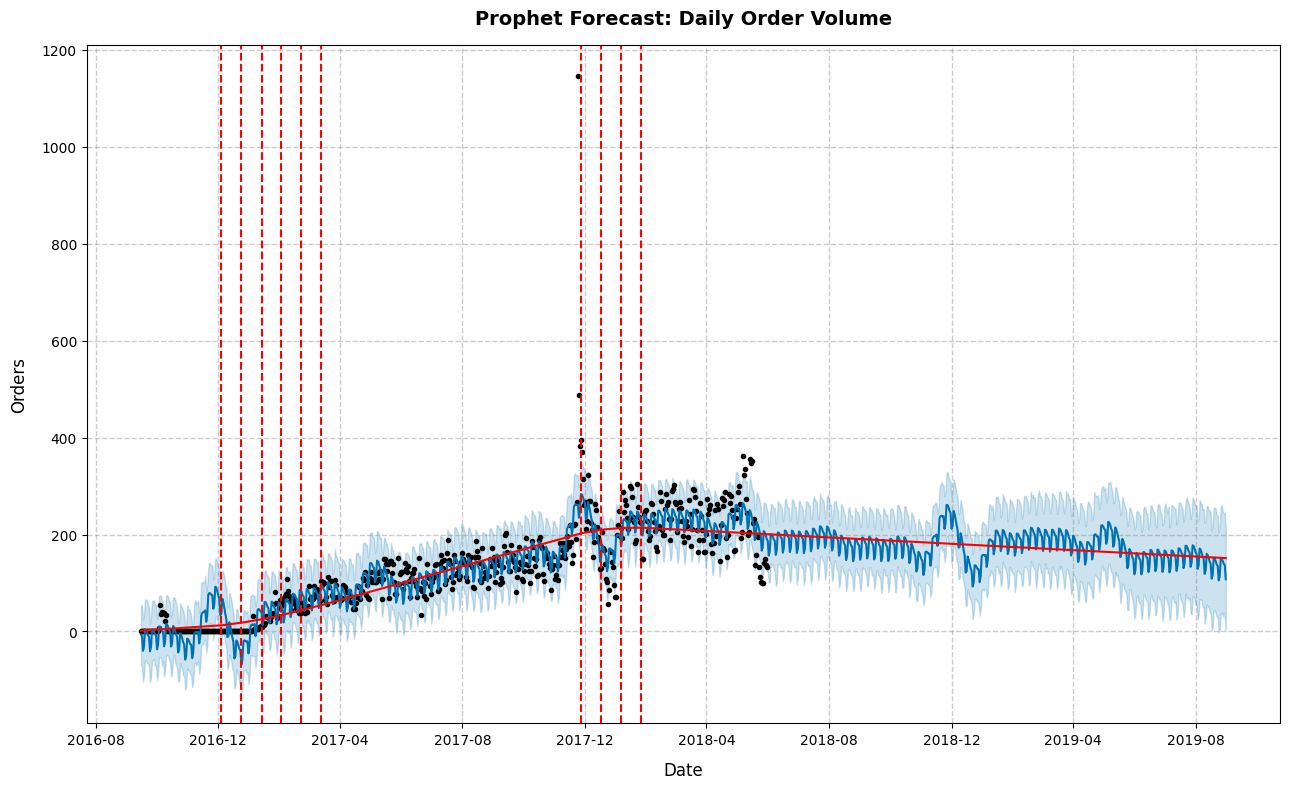

In [23]:
# Create forecast plot
fig = model.plot(forecast, figsize=(13, 8))

# Add title and axis labels
plt.title("Prophet Forecast: Daily Order Volume", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Orders", fontsize=12, labelpad=10)

# Improve grid
plt.grid(True, linestyle="--", alpha=0.4)

# Add changepoints (where Prophet detected trend shifts)
add_changepoints_to_plot(fig.gca(), model, forecast)

# Tighter layout
plt.tight_layout()
plt.show()

The forecasted values for the next 365 days are extracted to focus on the one-year prediction period starting from 2018-09-01. Predicted daily orders (`yhat`) are rounded to integer values for interpretability, while the corresponding confidence intervals (`yhat_lower` and `yhat_upper`) are retained. This subset provides a clear, actionable view of the model’s volume orders predictions for the upcoming year.

In [24]:
# Extract the future forecast 365 days (next year)
# so that prediction begins in 2018-09-01
future_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)  
future_forecast['yhat'] = future_forecast['yhat'].round().astype(int)
print("Forecast for the next year (2018/09 - 2019/08):")
print(future_forecast)

Forecast for the next year (2018/09 - 2019/08):
             ds  yhat  yhat_lower  yhat_upper
716  2018-09-01   148   83.308957  214.701763
717  2018-09-02   157   91.587822  219.701109
718  2018-09-03   194  132.199113  259.157823
719  2018-09-04   193  129.637886  255.739759
720  2018-09-05   189  130.183212  251.307551
...         ...   ...         ...         ...
1076 2019-08-27   150   39.753109  261.211722
1077 2019-08-28   145   31.352231  246.745594
1078 2019-08-29   140   39.148947  243.943086
1079 2019-08-30   137   28.453050  245.140366
1080 2019-08-31   108    2.474642  215.737380

[365 rows x 4 columns]


## 5. Behavioral Customer Segmentation via K-Means

In this section, customers are segmented into distinct behavioral groups using the K-Means clustering algorithm to uncover patterns in purchasing activity, spending levels, and satisfaction. This analysis provides actionable insights into customer diversity, enabling more targeted marketing strategies, improved retention efforts, and data-driven decision-making across the business.

### 5.1. Feature Standardization: Total Spent, Order Count, and Review Score

First, the key behavioral features total spending, average review score, and order count are selected to represent customer activity. Missing review scores are imputed using the mean, and features are standardized with `StandardScaler` to maintain uniform scale across variables for accurate clustering.

In [25]:
# Select features from customer_behavior for clustering
cluster_features = [
    'total_spent',
    'avg_review_score', 
    'order_count'
]
X_cluster = customer_behavior[cluster_features].copy()

# Impute missing review scores with mean review scores
X_cluster = X_cluster.fillna(X_cluster.mean())

# Apply standard scaling to features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

### 5.2. Determining K: Cluster Analysis and Validation Metrics

Once the data is standardized, we identify the optimal number of customer segments using the Elbow Method. K-Means is run iteratively for k values from 2 to 10, and the resulting inertia values are plotted. The point where inertia reduction starts to level off indicates the ideal number of clusters, balancing segmentation accuracy with model simplicity.

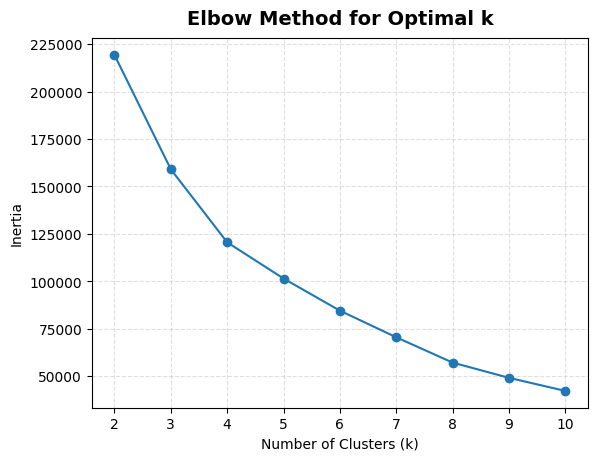

In [26]:
# Find optimal number of clustes(k) using the Elbow method
inertia = []
for k in range(2, 11):
    k_means = KMeans(
        n_clusters = k,
        n_init= 10,
        random_state=42
    )
    k_means.fit(X_cluster_scaled)
    inertia.append(k_means.inertia_)
    

# Plot the Elbow Curve
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight="bold", pad=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

From the plot, the optimal number of clusters for the K-Means algorithm is k = 4.

### 5.3. K-Means Execution: Creating Customer Segments

Using the selected number of clusters (k = 4), K-Means clustering is applied to assign each customer to a behavioral segment. The resulting groups are then analyzed by calculating the mean values of the key features total spending, average review score, and order count, providing a clear overview of the distinct behavioral patterns that characterize each segment.

In [27]:
# Apply K-Means with chosen k
chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
customer_behavior['customer_segment'] = kmeans.fit_predict(X_cluster_scaled)

# Analyze segments
num_cols = [
    'total_spent',
    'avg_review_score',
    'order_count', 
    'customer_segment'
]
segment_profile = customer_behavior[num_cols].groupby('customer_segment').mean().round(2)
print(segment_profile)

                  total_spent  avg_review_score  order_count
customer_segment                                            
0                     1255.18              4.10         1.12
1                      147.98              1.92         1.01
2                      299.55              4.32         2.25
3                      128.12              4.75         0.96


### 5.4. Cluster Interpretation: Behavioral Insights and Segment Properties

Then, each cluster is interpreted based on its average behavioral characteristics, and meaningful segment names are assigned to reflect distinct customer profiles. The segment distribution is visualized using a pie chart, illustrating the proportion of customers within each group and providing clear insights into the overall composition of the customer base.

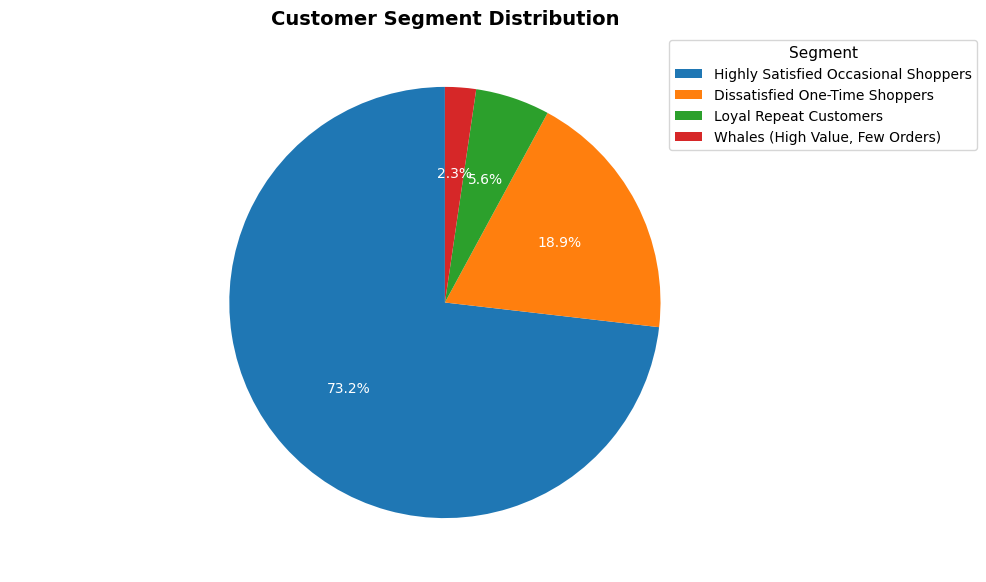

In [28]:
# Based on the means, we assign meaningful names
segment_names = {
    0: "Whales (High Value, Few Orders)",
    1: "Dissatisfied One-Time Shoppers",
    2: "Loyal Repeat Customers",
    3: "Highly Satisfied Occasional Shoppers"
}

customer_behavior['segment_name'] = customer_behavior['customer_segment'].map(segment_names)
segment_counts = customer_behavior['segment_name'].value_counts()

# Plot pie chart, number of customer per segment
plt.figure(figsize=(7, 7))
plt.pie(
    segment_counts.values, 
    labels=segment_counts.index, 
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color': 'white'}
)
plt.legend(
    title="Segment", 
    fontsize=10,
    title_fontsize=11,  
    bbox_to_anchor=(1, 0, 0.5, 1), 
    loc="upper right"
)
plt.title('Customer Segment Distribution',fontsize=14, fontweight="bold")
plt.show()

Additionally, joint plots are used to visualize customer segmentation based on the variables driving the clustering. The first plot shows the relationship between the number of orders and total spending for each segment, highlighting distinct behavioral patterns and potential correlations between purchase frequency and spending. Overall, first orders tended to be higher in value, indicating that customers spent more initially. Clear differences between segments are also visible: *Loyal Repeat Customers* made more purchases but spent less per order compared to *Whales*, who spent more per order but purchased less frequently. Meanwhile, *Dissatisfied One-Time Shoppers* and *Occasional Customers* typically made only one or none purchases.

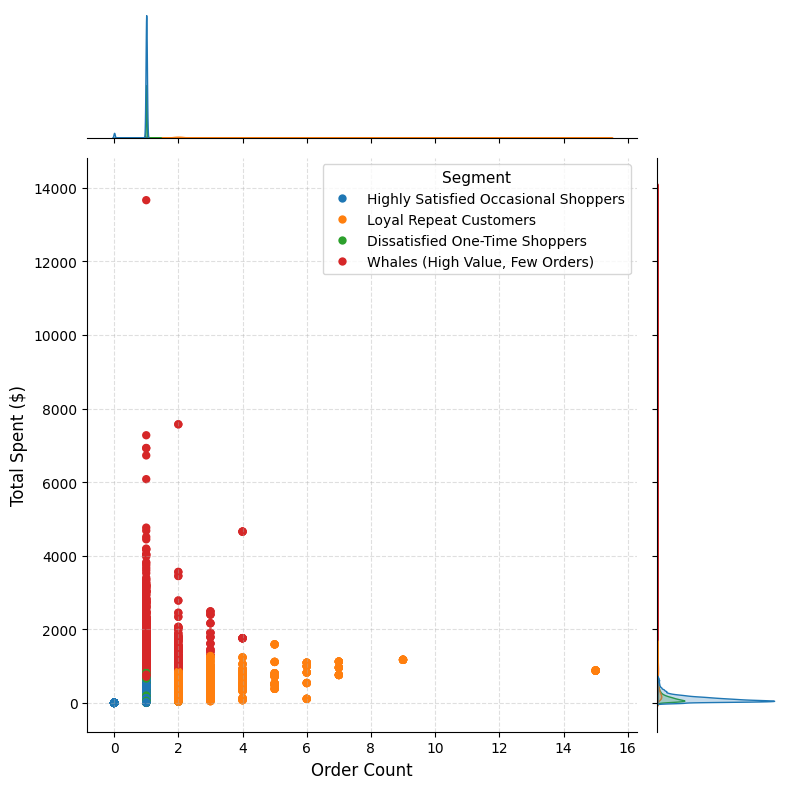

In [29]:
sns.jointplot(
    data=customer_behavior,
    x="order_count",
    y="total_spent",
    hue="segment_name",
    height=8, 
    ratio=4, 
    edgecolor='none'
)
plt.legend(title="Segment", fontsize=10, title_fontsize=11, loc="upper right")
plt.xlabel("Order Count", fontsize=12)
plt.ylabel("Total Spent ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

The next plot examines the relationship between average review score and total spending across customer segments, showing how satisfaction relates to spending and providing insight into the value of each segment. *Whales* spent the most and had a wide range of review scores from 1 to 5. *Loyal Repeat Customers* also spent more but generally gave slightly higher reviews overall. In contrast, *Dissatisfied One-Time Shoppers* tended to give low scores (1–3) and spent little, while *Highly Satisfied Occasional Shoppers* gave higher scores (4–5) but also spent relatively little.

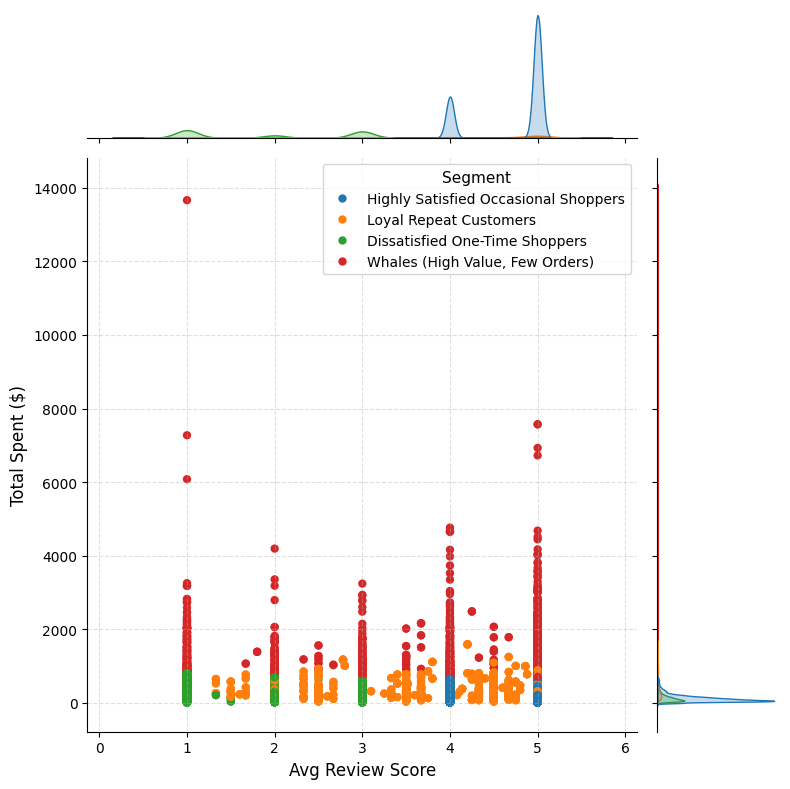

In [30]:
sns.jointplot(
    data=customer_behavior,
    x="avg_review_score",
    y="total_spent",
    hue="segment_name",
    height=8, 
    ratio=4, 
    edgecolor='none'
)
plt.xlabel("Avg Review Score", fontsize=12)
plt.ylabel("Total Spent ($)", fontsize=12)
plt.legend(title="Segment", fontsize=10, title_fontsize=11, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

Lastly, we visualize average review score versus order count across customer segments to explore how satisfaction relates to purchase frequency and highlight behavioral differences. *Whales* and *Loyal Repeat Customers* typically placed multiple orders and showed a wide range of review scores. In contrast, *Dissatisfied One-Time Shoppers* and *Highly Satisfied Occasional Shoppers* generally made only one or two purchases. Review scores clearly separate these segments: 1–3 for dissatisfied customers and 3.5–5 for highly satisfied occasional shoppers.

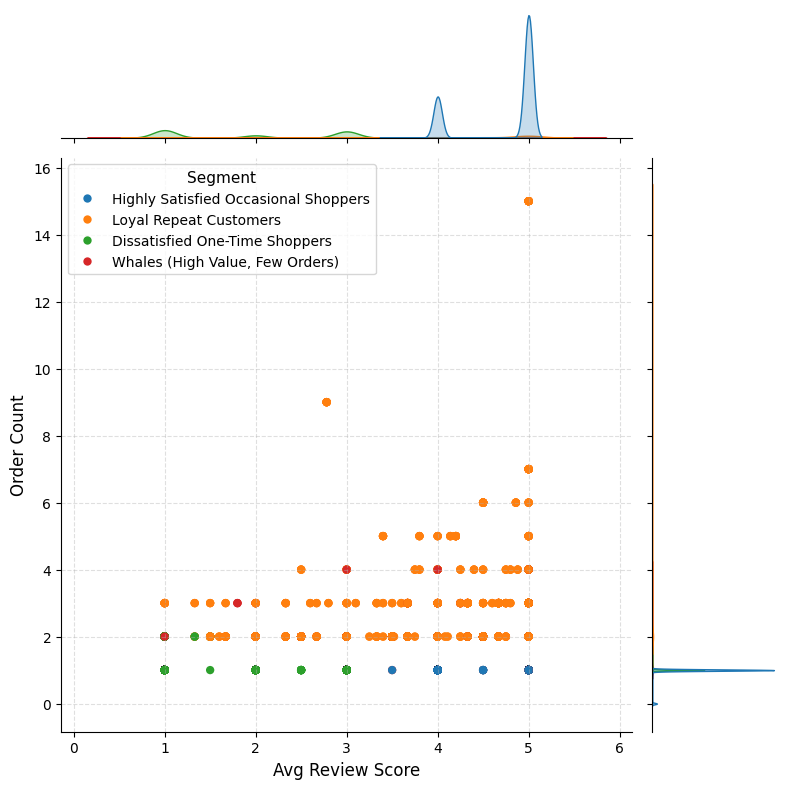

In [31]:
sns.jointplot(
    data=customer_behavior,
    x="avg_review_score",
    y="order_count",
    hue="segment_name",
    height=8, 
    ratio=4, 
    edgecolor='none'
)

plt.legend(title="Segment", fontsize=10, title_fontsize=11, loc="upper left")
plt.xlabel("Avg Review Score", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

To integrate behavioral insights with review data, customer segment labels are merged back into the main review dataset, linking each customer to their corresponding segment. The distribution of segments is then examined, providing an overview of how different customer types contribute to the collected reviews.

In [32]:
# Merge Segment Labels back into the main review_data
reviews_data = reviews_data.merge(
    customer_behavior[['customer_unique_id', 'segment_name']],
    on='customer_unique_id',
    how='left'
)

Segment distribution in review data:
segment_name
Highly Satisfied Occasional Shoppers    73074
Dissatisfied One-Time Shoppers          19181
Loyal Repeat Customers                  13432
Whales (High Value, Few Orders)          2702
Name: count, dtype: int64


## 6. Integrating Predictive Analytics: Customer Segments with Order Forecasts

In this section we integrate the previously generated order forecasts, made with our Prophet model, with the identified customer segments to provide a holistic view of future demand. By linking predicted order volumes to behavioral segments, it becomes possible to anticipate next year's segment-specific trends and support strategic planning for targeted marketing and resource allocation.

### 6.1. Creating a Unified View: Merging Forecasts with Customer Segments

First, we count the number of purchases each month. These monthly counts are then aggregated by customer segment, and their relative contributions are calculated as percentages. This provides insight into the temporal distribution of orders across segments, forming the foundation for projecting future segment-specific order volumes.

In [33]:
# Analyze Historical Segment Distribution
# Group timestamp monthly
reviews_data['purchase_per_month'] = reviews_data['order_purchase_timestamp'].dt.to_period('M')

# Calculate the percentage of orders from each segment each month
monthly_segment_dist = reviews_data.groupby(['purchase_per_month', 'segment_name']).size().unstack(fill_value=0)
monthly_segment_prct = monthly_segment_dist.div(monthly_segment_dist.sum(axis=1), axis=0)

### 6.2. Strategic Planning: Projected Monthly Order Distribution Across Segments

Subsequently, the projected monthly order distribution is estimated by applying each segment’s historical proportion from the previous year to the aggregated monthly forecasted orders. Daily forecasts are first summed to obtain monthly totals, and then each segment’s historical share is used to allocate its contribution to future orders. This method provides actionable insights into segment-specific demand, aiding strategic planning and resource allocation for the coming year.

In [34]:
# Use last year monthly distribution for the monthly forecast 
segments = reviews_data.segment_name.unique().tolist()
last_year_dist = monthly_segment_prct.iloc[11:]

# Aggregate Daily Forecast to Monthly
future_forecast['ds'] = pd.to_datetime(future_forecast['ds'])
future_forecast['month'] = future_forecast['ds'].dt.to_period('M')
monthly_forecast_orders = future_forecast.groupby('month')['yhat'].sum().round().astype(int)

# Apply Segment Distribution to the Forecast
forecast_df = pd.DataFrame(index=last_year_dist.index, columns=last_year_dist.columns)

for j in range(len(last_year_dist)):
    # Get the j-th row of last_year_dist and multiply by j-th value of monthly_forecast
    forecast_df.iloc[j] = last_year_dist.iloc[j] * monthly_forecast_orders.iloc[j]

forecast_df.index = monthly_forecast_orders.index
print("Forecasted Monthly Orders by Segment (2018/09 - 2019/08):")
display(forecast_df)

Forecasted Monthly Orders by Segment (2018/09 - 2019/08):


segment_name,Dissatisfied One-Time Shoppers,Highly Satisfied Occasional Shoppers,Loyal Repeat Customers,"Whales (High Value, Few Orders)"
month,,,,
2018-09,771.265271,3457.002618,846.566318,155.165794
2018-10,858.437805,3490.693902,777.858537,159.009756
2018-11,1324.331563,3645.25607,743.914643,163.497724
2018-12,992.699272,3340.619394,587.827043,83.85429
2019-01,1121.74291,3707.467962,694.129464,130.659664
2019-02,1309.150629,3114.493712,863.906506,114.449153
2019-03,1571.099319,3558.940061,672.649179,132.31144
2019-04,922.564438,3769.56986,542.464896,147.400806
2019-05,946.823005,4001.862693,603.828993,175.485308


Now, we prepare the forecasted monthly orders by segment for plotting. We convert data types to integers, reset the index, and set the month column as a categorical variable to make trends across segments easier to visualize.

In [35]:
forecast_df_plt = forecast_df.copy()
for col in forecast_df_plt:
    forecast_df_plt[col] = forecast_df_plt[col].astype(int)
forecast_df_plt.reset_index(inplace=True)

forecast_df_plt['Month'] = forecast_df_plt['month'].astype('category')

We visualize the forecasted monthly orders by segment using bar and line plots. Bars show orders per segment each month, while lines highlight overall trends, making it easier to see segment contributions and temporal patterns.

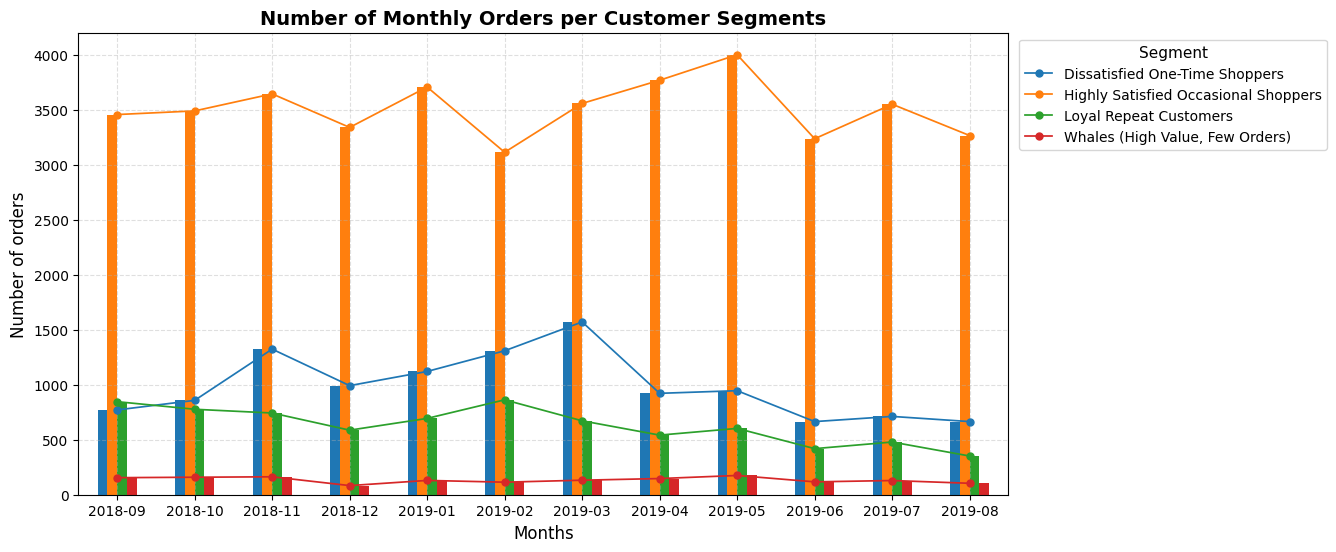

In [65]:
# Plot forecast
fig, ax = plt.subplots(figsize=(12, 6))

# Plot all segments as bars
forecast_df_plt.plot(
    kind='bar', 
    x='Month', 
    ax=ax
)
forecast_df_plt.plot(
    kind='line',
    x='Month',
    ax=ax,
    marker='o',
    markersize=5,
    linewidth=1.25
)
plt.legend(
    forecast_df.columns, 
    title="Segment", 
    fontsize=10, 
    title_fontsize=11, 
    bbox_to_anchor=(1.35, 1), 
    loc='upper right'
)

plt.title('Number of Monthly Orders per Customer Segments', fontsize=14, fontweight="bold")
plt.xlabel("Months", fontsize=12)
plt.ylabel('Number of orders', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)

# Save the figure
fig.savefig(
    'monthly_orders_per_segment.png', 
    dpi=300,
    bbox_inches='tight'
)  
plt.show()

Finally, the prepared forecasted monthly orders by segment are exported to a CSV file, enabling further analysis, reporting, or integration with other business planning tools.

In [37]:
# Save to CSV
forecast_df_plt.to_csv("forecast_df_plt.csv", index=False)

## 7. Sentiment Analysis: Customer Review Insights with Transformers

In this section we leverage transformer-based natural language processing to analyze customer reviews and quantify sentiment in portuguese. By extracting sentiment scores from review texts, these insights can be integrated with customer and order data to enhance predictive models and provide a deeper understanding of customer satisfaction and behavior.

### 7.1. Multilingual Model Implementation: XLM-RoBERTa Pipeline

A multilingual transformer model, XLM-RoBERTa, is implemented to perform sentiment analysis on customer review texts. The pipeline processes each review, truncating long texts as needed, and outputs both a sentiment label and a confidence score.

In [38]:
def analyze_sentiment(reviews, reviews_data):
    # Initialize the Sentiment Analysis Pipeline
    print('Loading sentiment model...')
    sentiment_analyzer = pipeline('sentiment-analysis', model='cardiffnlp/xlm-roberta-base-tweet-sentiment-pt')
    
    # Define a helper function to analyze a single review
    def get_sentiment(text):
        if pd.isna(text) or text.strip() == '':
            return np.nan, np.nan
        try:
            # Truncate long reviews to model's max input length
            truncated_text = text[:512]
            result = sentiment_analyzer(truncated_text)[0]
            return result['label'], result['score']
        except:
            return np.nan, np.nan
    
    # Apply function to text reviews
    print("Analyzing sentiment for text reviews...")
    reviews_data[['sentiment_label', 'sentiment_score']] = reviews['review_comment_message'].apply(
        lambda text: pd.Series(get_sentiment(text))
    )
    print("Sentiment analysis complete!")

### 7.2. Feature Integration: Incorporating Sentiment into Predictive Models

Then, sentiment analysis results are either loaded from a previously saved file or generated anew using the XLM-RoBERTa pipeline. For new analyses, duplicate customer entries are removed to retain the first occurrence, and the processed sentiment features label and score are saved to a CSV file. This ensures structured sentiment data is ready for integration into predictive models.

In [39]:
# Sentiment Analysis Management: analyze or Load
while True:
    ans = input("Sentiment Analysis: start a new analysis or "
                "load an existing file? (new/load)").strip().lower()
    if ans in ("new", 'load'):
        break
    else:
        print("Please enter either 'new' or 'load'.")

if ans == 'load':
    try:
        reviews_data = pd.read_csv("reviews_data.csv")
        print("Sentiment analysis file loaded succesfully!")
        
    except FileNotFoundError:
        print("Error: Saved analysis not found",
             "Please start a new analysis")
        ans='new'
        
if ans == 'new':
    try:
        analyze_sentiment(reviews, reviews_data)
        
        # Keep the first occurrence of each 'id'
        reviews_data = reviews_data.drop_duplicates(subset=["customer_unique_id"], keep="first")
    
        # Save to CSV
        reviews_data.to_csv("reviews_data.csv", index=False)
        print("New analysis saved succesfully!")
        
    except RuntimeError:
        print("An error occurred during the analysis")                                                

Sentiment analysis file loaded succesfully!


## 8. XGBoost-Powered Hybrid System for Delivery Time Prediction

In this section, we integrate the behavioral customer segmentation and sentiment analysis results to develop a hybrid predictive system for estimating delivery times using XGBoost regression. By combining further feature engineering, exploratory data analysis, and hyperparameter bayesian optimization with Optuna, the model aims to deliver accurate delivery time predictions. The resulting system is then evaluated to assess its predictive performance and reliability, offering actionable insights to support operational planning and enhance customer satisfaction.

### 8.1. Advanced Feature Engineering for Enhanced Model Performance

First, the customer and geolocation datasets are merged to enrich the review data with seller and location details, as these factors can influence delivery time. To ensure accurate integration, zip code columns are standardized before assigning each customer their corresponding latitude and longitude coordinates. Before merging, duplicate records are removed so that every customer has a single, consistent geolocation entry.

In [41]:
# Merge with items dataset to link orders and sellers
reviews_data = reviews_data.merge(
    items[['order_id', 'seller_id']],
    on='order_id',
    how='left'
)

# Rename predefined zip_code columns to be able to merge columns must have identical name
customers.columns = ['customer_id', 'customer_unique_id', 'zip_code_prefix',
       'customer_city', 'customer_state']
geolocation.columns = ['zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state']

# Add customer's geolocation information by merging datasets
loc_customers = customers[['customer_id', 'zip_code_prefix']].merge(
    geolocation[['zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
    on='zip_code_prefix',
    how='left'
)
loc_customers.columns = ['customer_id', 'zip_code_prefix',
       'customer_lat', 'customer_lng']
loc_customers.drop(columns=["zip_code_prefix"], inplace=True)
loc_customers = loc_customers.drop_duplicates(subset='customer_id')

# Merge back to main dataframe
reviews_data = reviews_data.merge(
    loc_customers,
    on='customer_id',
    how='left'
)

Similarly, the seller data is merged with geolocation information to assign latitude and longitude coordinates to each seller based on their zip code. Column names are aligned for accurate integration, and duplicate records are removed to maintain a single geolocation entry per seller. The merged coordinates are then incorporated into the review dataset.

In [42]:
sellers.columns = ['seller_id', 'zip_code_prefix', 'seller_city', 'seller_state']
geolocation.columns = ['zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state']

# Add sellers' geolocation information by merging datasets
loc_sellers = sellers[['seller_id', 'zip_code_prefix']].merge(
    geolocation[['zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
    on='zip_code_prefix',
    how='left'
)
loc_sellers.columns = ['seller_id', 'zip_code_prefix', 'seller_lat', 'seller_lng']
loc_sellers.drop(columns=["zip_code_prefix"], inplace=True)
loc_sellers = loc_sellers.drop_duplicates(subset='seller_id')

reviews_data = reviews_data.merge(
    loc_sellers,
    on='seller_id',
    how='left'
)

Next, duplicate entries for customers are removed to ensure that each unique customer is represented only once. Additionally, rows with missing target values (`delivery_time_days`) are dropped to maintain a clean dataset for model training and evaluation.

In [43]:
# Remove duplicated customers uniques ids
reviews_data = reviews_data.drop_duplicates(subset='customer_unique_id')

# Drop rows where Target is NaN
reviews_data.dropna(subset=['delivery_time_days'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 92638 entries, 0 to 108899
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_unique_id                     92638 non-null  object 
 1   customer_id                            92638 non-null  object 
 2   total_spent                            92638 non-null  float64
 3   order_count                            92638 non-null  int64  
 4   avg_review_score                       92638 non-null  float64
 5   review_id                              92638 non-null  object 
 6   order_id                               92638 non-null  object 
 7   review_score                           92638 non-null  float64
 8   order_purchase_timestamp               92638 non-null  object 
 9   delivery_time_days                     92638 non-null  float64
 10  estimated_delivery_time_days           92638 non-null  float64
 11  approv

At this stage, several advanced features are engineered to enhance delivery time prediction through an iterative process, with each new feature aimed at improving the model’s **R²** score. Key features include distance-based metrics, customer behavior features, engagement indicators, and seller-level metrics:

- **Distance-based metrics:** Calculated using the Haversine formula between customers and sellers, these include estimated delivery speed and performance, reflecting potential delays or penalties.

- **Customer behavior features:** Capturing spending per order, volume-time interactions, loyalty score, and a combined experience index, these provide insight into purchasing patterns and satisfaction.

- **Engagement indicators:** Binary flags for good reviews and repeat orders further describe customer activity.

- **Seller-level metrics:** Seller count and average seller review quantify reliability and overall performance.

Relevant columns are converted to categorical or float types to ensure the dataset is ready for modeling. These features proved most significant in improving prediction accuracy.

In [44]:
# Calculate distance between customers and sellers through Haversine equations
R = 6371  # Earth radius in km
lat1 = np.radians(reviews_data.customer_lat)
lat2 = np.radians(reviews_data.seller_lat)
dlat = lat2 - lat1
dlon = np.radians(reviews_data.seller_lng - reviews_data.customer_lng)

a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2

reviews_data['distance_km'] = 2 * R * np.arcsin(np.sqrt(a))

# Calculate estimated delivery speed
reviews_data['delivery_speed'] = np.where(
    reviews_data['estimated_delivery_time_days'] < reviews_data['delivery_time_days'],
    (reviews_data['distance_km'] / reviews_data['estimated_delivery_time_days']) * (-10) * reviews_data['avg_review_score'],  # Penalty for Underestimation of Delivery Time
    reviews_data['distance_km'] / reviews_data['estimated_delivery_time_days'] * 10 * reviews_data['avg_review_score']
)

# Calculate estimated delivery performance
reviews_data['estimated_delivery_performance'] = np.where(
    reviews_data['estimated_delivery_time_days'] > reviews_data['delivery_time_days'],
    (reviews_data['avg_review_score'] / reviews_data['estimated_delivery_time_days']) * (-5), #Penalty for Overestimation of Delivery Time
    reviews_data['avg_review_score'] / reviews_data['estimated_delivery_time_days']
)

# Customer spent per order
reviews_data['spent_per_order'] = reviews_data['total_spent'] ** 2 / (reviews_data['order_count'] + 1)

# Customer experience interactions
reviews_data['volume_time_interaction'] = np.log(reviews_data['order_count'] / reviews_data['estimated_delivery_time_days'])

# Customer loyalty metrics
reviews_data['loyalty_score'] = np.log((reviews_data['order_count'] * reviews_data['avg_review_score']) / (reviews_data['estimated_delivery_time_days'] + 1) ** 2)

# Combined experience metric
reviews_data['customer_experience_index'] = (reviews_data['avg_review_score']**2 - reviews_data['estimated_delivery_performance']**2) / 2

# Is good review or no
reviews_data['is_good_review'] = np.where(
    reviews_data['avg_review_score'] >= 4,
    1,
    0
)

# Ordered twice or more
reviews_data['order_again'] = np.where(
    reviews_data['order_count'] >= 2,
    1,
    0
)

# Count number each seller appears, hopping to catch bad sellers
reviews_data['seller_count'] = np.log(reviews_data.groupby('seller_id')['seller_id'].transform('count'))

# Calculate average seller review
reviews_data['seller_reviews'] = reviews_data['avg_review_score'] * np.sqrt(reviews_data['seller_count'])

# Change data types to categoricals and floats
reviews_data['customer_unique_id'] = reviews_data['customer_unique_id'].astype('category')
reviews_data['seller'] = reviews_data['seller_id'].astype('category')
reviews_data['segment_name'] = reviews_data['segment_name'].astype('category')
reviews_data['sentiment_label'] = reviews_data['sentiment_label'].astype('category')
reviews_data['is_good_review'] = reviews_data['is_good_review'].astype('category')
reviews_data['order_again'] = reviews_data['order_again'].astype('category')

### 8.2. Exploratory Data Analysis: Investigating Feature Relationships for Delivery Time Prediction

Once all features have been created to feed the model, we generate histograms for the relevant variables to examine their distributions and segment-specific patterns. Core features such as order count, total spending, average review score, and customer–seller distance are analyzed together with sentiment metrics, engineered variables, and interaction terms, allowing us to explore how these factors relate to each other. By coloring each histogram according to customer segment, we can compare behavioral groups and highlight variations that may influence delivery time. This visual inspection not only reveals data spread and potential outliers but also uncovers segment-specific trends that help guide feature selection and modeling strategies.

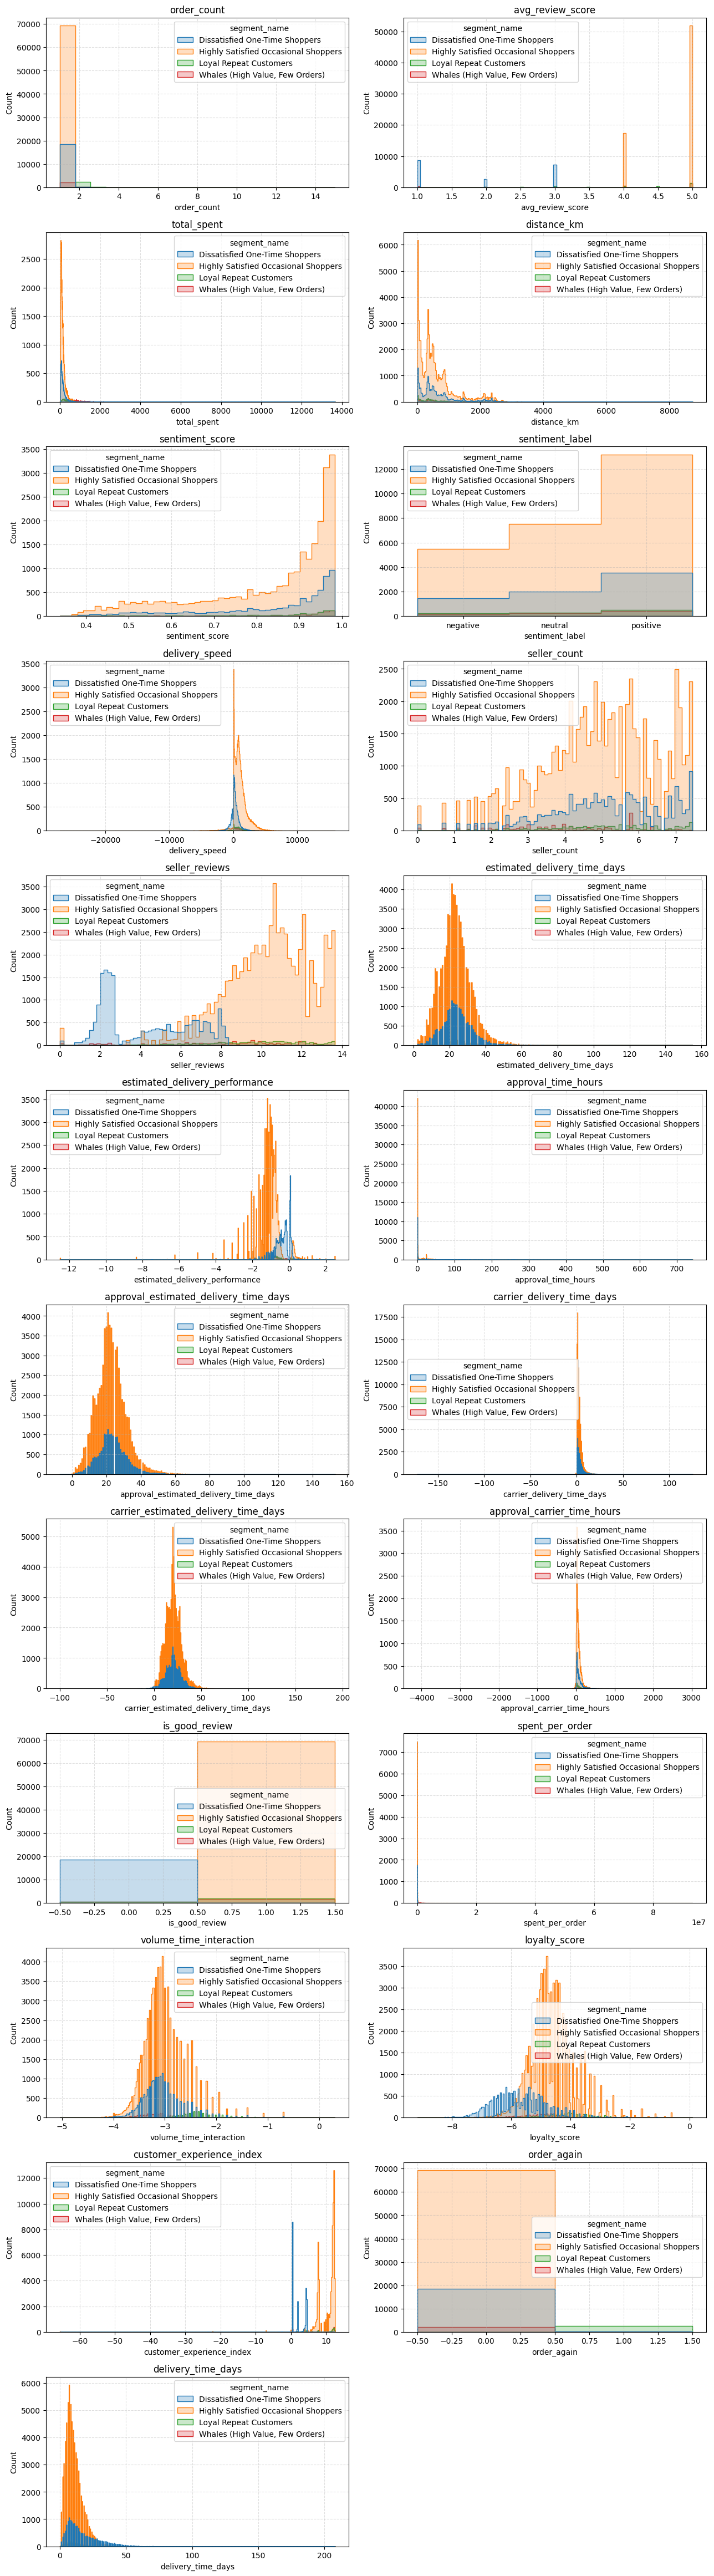

In [45]:
cols = [
    # Main features
    'order_count',
    'avg_review_score',
    'total_spent',
    'distance_km',
    # Sentiment analysis features
    'sentiment_score', 
    'sentiment_label',
    # Engineered features
    'delivery_speed',
    'seller_count',
    'seller_reviews',
    'estimated_delivery_time_days',
    'estimated_delivery_performance',
    'approval_time_hours', 
    'approval_estimated_delivery_time_days',
    'carrier_delivery_time_days',
    'carrier_estimated_delivery_time_days',
    'approval_carrier_time_hours',
     # Interacting from main features
    'is_good_review',
    'spent_per_order',
    'volume_time_interaction',
    'loyalty_score',
    'customer_experience_index',
    'order_again',
    # Target
    'delivery_time_days'
]
        

plt.figure(figsize=(13, 50))
for i, col in enumerate(cols, 1):
    plt.subplot(13, 2, i)
    sns.histplot(
        data=reviews_data,
        x=col,
        hue="segment_name",
        element="step"
    )
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.title(col)
    
plt.tight_layout()
plt.show()

Overall, the feature distributions appear suitable for analysis by our model, though they exhibit a variety of shapes and scales. Some features show high skewness, while others are only mildly skewed, and a few roughly follow a normal distribution. Despite the differences in scale and distribution, attempts to transform these features like logarithmic scaling, normalization, or other rescaling methods did not yield improvements in model performance, so they were retained in their original form. A subset of features has distributions that appear nearly discrete, although they are technically continuous, while others are genuinely discrete. This diversity in feature distributions highlights the robustness of the model to handle variables with different characteristics and suggests that the engineered features capture meaningful variation without requiring extensive preprocessing.

Next, a correlation matrix is computed for all numerical features to quantify pairwise linear relationships and highlight how features relate to each other. The resulting heatmap reveals strong positive and negative associations, helping to identify potential multicollinearity and highlight influential features. Using this and the histograms plotted earlier, we selected the most potentially impactful features for model optimization and development.

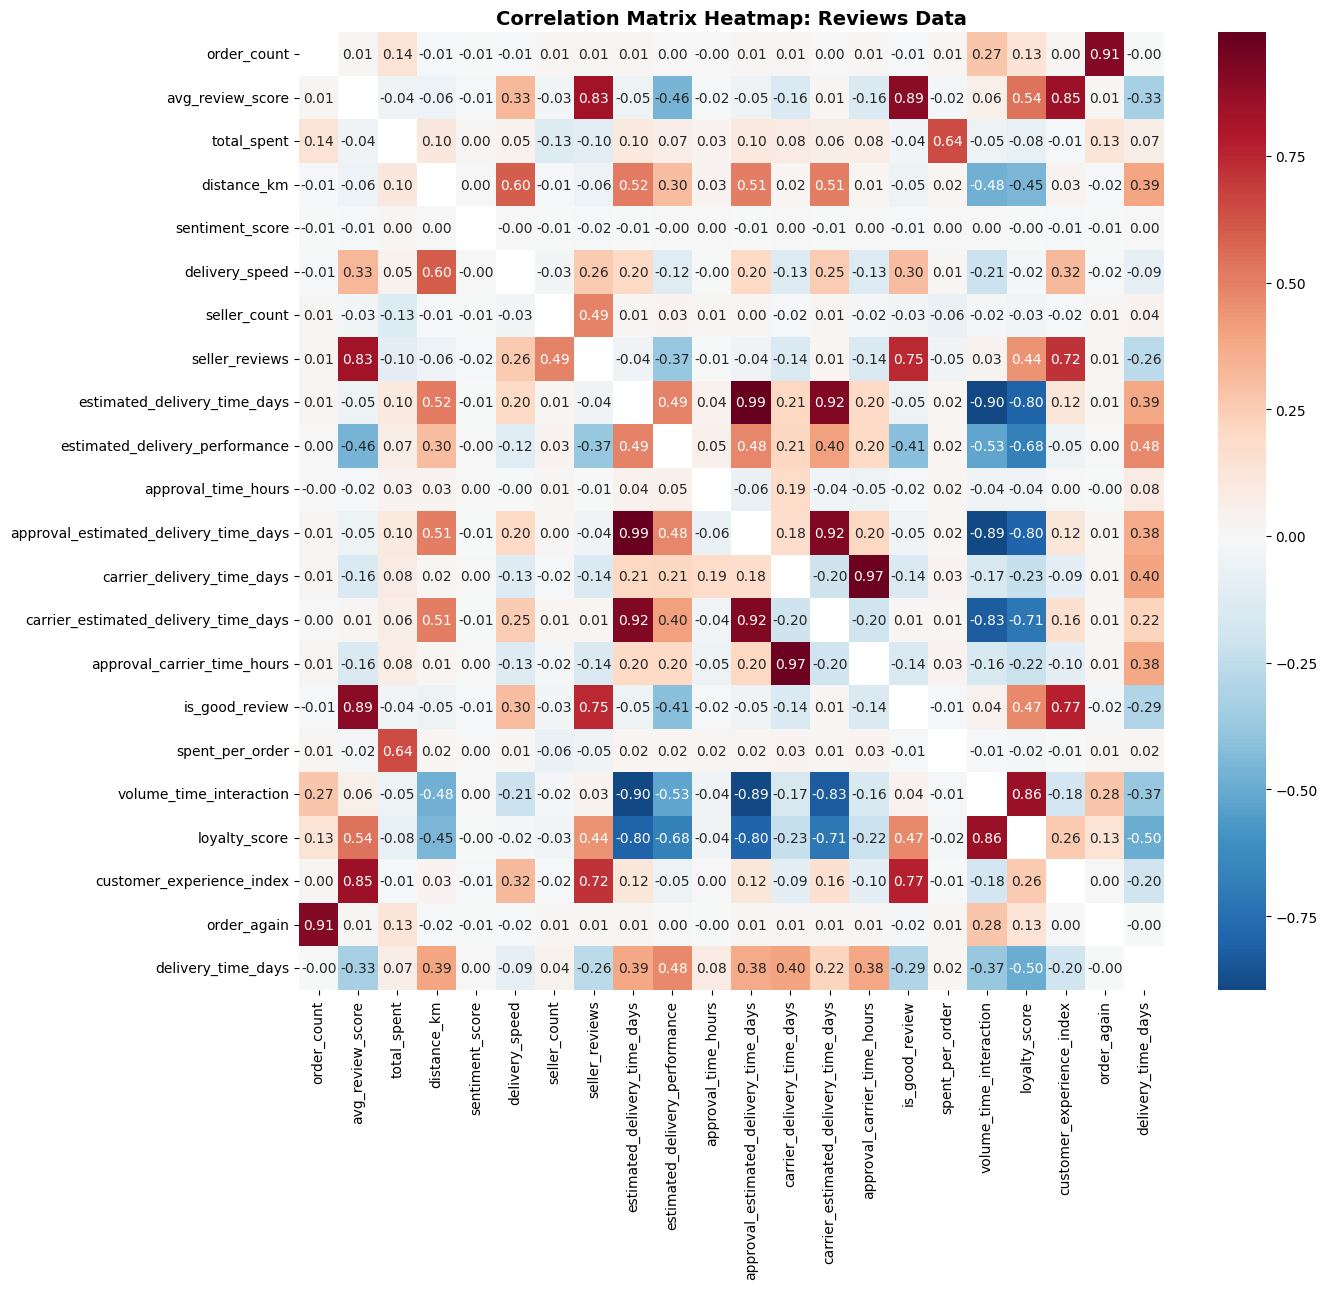

In [46]:
# Calculate the correlation matrix
columns = cols.copy()
columns.remove('sentiment_label')
corr_matrix = reviews_data[columns].corr()

# Create a mask that is True only on the diagonal
mask = np.eye(corr_matrix.shape[0], dtype=bool) # Creates an identity matrix

# Plot correlation matrix
plt.figure(figsize=(14, 13))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='RdBu_r',
    center=0,
    fmt='.2f'
)
plt.title('Correlation Matrix Heatmap: Reviews Data', fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### 8.3. XGBoost Regression and Hyperparameter Optimization Using Optuna

Before training our XGBoost regression model, we first define the features and target variables. The feature set `X` includes customer identifiers, key behavioral metrics, customer segments, sentiment analysis outputs, engineered delivery and interaction metrics, and binary indicators, while the target variable `y` represents the actual delivery time in days.

In [47]:
# Define features and target
features = [
    # Customer Identifier
    'customer_unique_id',
    # Main features
    'order_count',
    'avg_review_score',
    'total_spent',
    'distance_km',
    'seller',
    # Clustering feature
    'segment_name',
    # Sentiment analysis features
    'sentiment_score', 
    'sentiment_label',
    # Engineered features
    'delivery_speed',
    'seller_count',
    'seller_reviews',
    'estimated_delivery_time_days',
    'estimated_delivery_performance',
    'approval_time_hours',
    'approval_estimated_delivery_time_days',
    'carrier_delivery_time_days',
    'carrier_estimated_delivery_time_days',
    'approval_carrier_time_hours',
     # Interacting from main features
    'is_good_review',
    'spent_per_order',
    'volume_time_interaction',
    'loyalty_score',
    'customer_experience_index',
    'order_again'
]

X = reviews_data[features].copy() 
y = reviews_data['delivery_time_days']

Next, we split the data into training and testing sets, with 80% of the data allocated for training and 20% for testing, the training set is further divided into training and validation subsets (80% / 20%) to enable model tuning and evaluation on unseen data while preserving a separate test set for final performance assessment.

In [48]:
# First split: 80% train, 20% test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, 
    y, 
    test_size=0.20,
    random_state=42)

# Second split: Split training into train/validation, 80% / 20%
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, 
    y_train_full, 
    test_size=0.20,
    random_state=42
)

We define utility functions to save and load trained models using `joblib`. The `save_model` function writes a model to disk, while the `load_model` function retrieves a saved model. These will ensure reproducibility and simplify model deployment or future analysis.

In [49]:
def save_model(model, filename):
    """Saved trained model"""
    try:
        joblib.dump(model, filename)
        print(f"Model saved successfully as {filename}")
        return True
    except Exception as e:
        print(f"Error saving model: {e}")
        return False

def load_model(filename):
    """Load saved model """
    try:
        if not os.path.exists(filename):
            raise FileNotFoundError(f"Model file {filename} not found")
        
        model = joblib.load(filename)
        print(f"Model loaded successfully from {filename}")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

Moving on, we define an Optuna objective function to optimize the XGBoost hyperparameters for delivery time prediction. The search space covers the learning rate, number of estimators, tree depth, regularization terms, sampling ratios, and minimum child weight. The model is trained with early stopping on a validation set, and pruning is applied to terminate underperforming trials early. Model performance is evaluated using the `R²` score on the test set, guiding Optuna in selecting the optimal hyperparameter configuration using bayesian optimization.

In [50]:
def objective(trial):
    # Define hyperparameter search space
    params = {
        'objective': 'reg:squarederror',
        'tree_method': 'hist',  # Good for performance
        'random_state': 42,
        'enable_categorical': True,
        
        # Optimize further:
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),  # Slightly tighter upper bound
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),  # Fewer max trees (faster trials)
        'max_depth': trial.suggest_int('max_depth', 3, 10),  # Slightly tighter
        
        # Regularization
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'gamma': trial.suggest_float('gamma', 1e-8, 0.5, log=True),
        
        # Sampling
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),  # Slightly tighter lower bound
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),  # Helps with stability
    }

    # Use pruning to stop bad trials early
    pruning_callback = XGBoostPruningCallback(trial, "validation_0-rmse")
    
    # Initialize XGBRegressor
    model = XGBRegressor(**params)
    
    # Train with validation and pruning
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=50,
        callbacks=[pruning_callback],
        verbose=False
    )
    # Get best score from the trained model
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

Now, we define the `train_xgbregressor` function, which manages both model training and hyperparameter optimization with Optuna. An Optuna study is initialized using a Hyperband pruner to efficiently stop underperforming trials. The objective function is optimized across multiple trials to maximize the `R²` score on the test set. After identifying the best hyperparameters, the final XGBoost regressor is retrained on the full training data (training + validation) to make use of all available samples and build a more robust predictive model.

In [51]:
def train_xgbregressor():
    '''Training and optimization using optuna '''
    # Suppress trial logs
    optuna.logging.set_verbosity(optuna.logging.ERROR)
    
    # Create and run the Optuna study with pruning
    study = optuna.create_study(
        direction="maximize", 
        pruner=optuna.pruners.HyperbandPruner()
    ) 
    # stop poor trials early
    study.optimize(objective, n_trials=100, n_jobs=-1, show_progress_bar=True)
    
    print("Best params (Optuna):", study.best_params)
    print(f"Best R2: {study.best_value:.2f}")
    
    # Retrain best model on full training data and save
    best_params = study.best_params
    
    # Retrain on combined training + validation data
    final_model = XGBRegressor(**best_params, enable_categorical= True)
    final_model.fit(
        X_train_full,
        y_train_full,  # Use all available training data
        verbose=False
    )
    return final_model

We allow the model to be either loaded from a previous training or newly trained from scratch. If a saved XGBoost regression model is available, it is loaded and its parameters are verified. If no model exists or the user decides to retrain, the `train_xgbregressor` function runs to perform hyperparameter optimization and model training. The resulting model is then saved to disk for future use, ensuring reproducibility and efficient deployment.

In [52]:
while True:
    ans = input("XGB Regression: Train a new model or "
                "load a saved one? (train/load) ").strip().lower()
    if ans in ('train', 'load'):
        break
    else:
        print("Please enter either 'train' or 'load'.")

# Initialize the variable to avoid NameError later
xgb_model = None 

if ans == "load":
    try:
        xgb_model = load_model('xgb_regressor.joblib')
        print("Model loaded successfully!")
        # Print parameters to verify it's the right model
        print("\nLoaded model parameters:", xgb_model.get_params())
    except FileNotFoundError:
        print("Error: Saved model file not found",
              "Please train a new model.")
        # After error, set the flow to 'train'
        ans = 'train'

# If we are training (either by choice or because load failed)
if ans == "train":
    print("XGB Regression model...")
    # Train XGBM Regressor
    xgb_model = train_xgbregressor()
    
    # Save the best model
    save_model(xgb_model,'xgb_regressor.joblib')
    print("Model saved successfully!")

Model loaded successfully from xgb_regressor.joblib
Model loaded successfully!

Loaded model parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9112320973864311, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': True, 'eval_metric': None, 'feature_types': None, 'gamma': 0.001061410875441483, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.012451112901591099, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 9, 'max_leaves': None, 'min_child_weight': 4.925212570834864, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 394, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': 3.29543018326008e-06, 'reg_lambda': 6.10288644185327e-05, 'sampling_method': None, 'scale_pos_weight': No

### 8.4. System Evaluation: Assessing Hybrid Model Accuracy and Reliability

Finally, our hybrid XGBoost regression model is evaluated on both the training and test sets using standard metrics **R²**, **RMSE**, and **MAE** to assess predictive accuracy and generalization. The model achieves an R² of 0.83 on the training set and 0.69 on the test set, with an RMSE of 5.13 days and an MAE of 3.20 days, capturing historical patterns while showing strong accuracy and consistent reliability on unseen data.

In [53]:
# Predict
y_pred = xgb_model.predict(X_test)
R2 = r2_score(y_test,y_pred)
# Evaluate
print(f"Train R2: {r2_score(y_train_full, xgb_model.predict(X_train_full)):.2f}")
print(f"Test R2: {R2:.2f}")

mse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {mse:.2f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

Train R2: 0.83
Test R2: 0.69
RMSE: 5.14
MAE: 3.19


The scatter plot below compares residuals from the baseline system’s estimated delivery time and our model’s new estimated delivery time predictions. Each set of residuals is shown with a regression line only to highlight trends, and the red zero-residual line indicates perfect predictions. We can see that our model reduces the residual spread, and the regression line helps visualize how the new estimates better match actual delivery times.

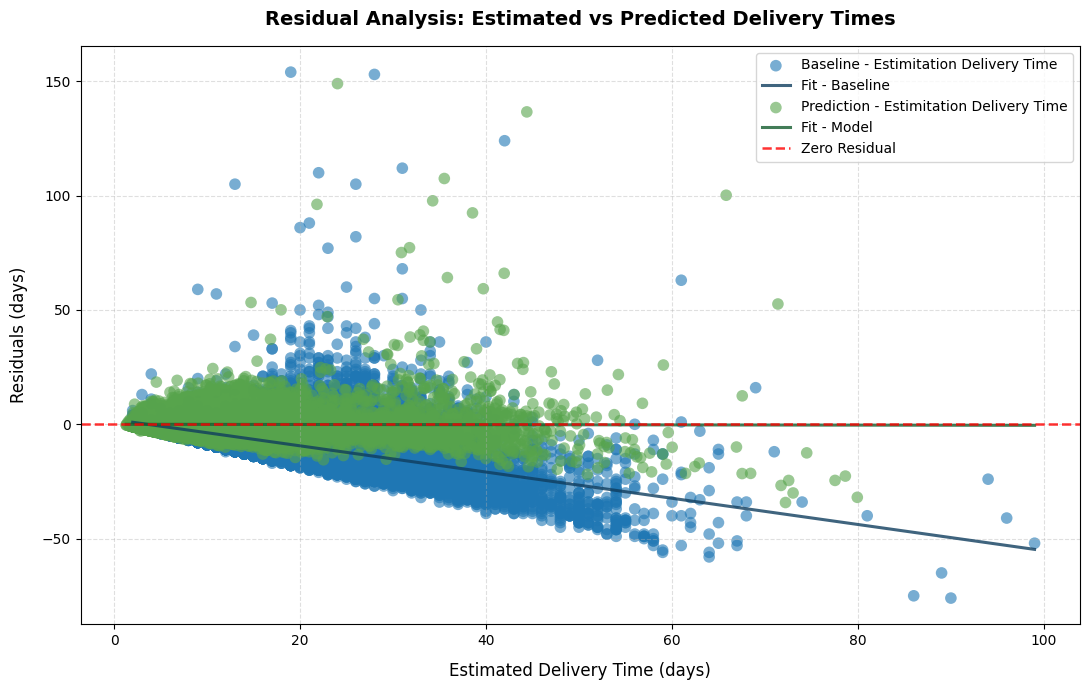

In [54]:
# Residual Analysis: Estimated vs Predicted Delivery Times

# Extract reference estimated delivery times
y_stm = X_test["estimated_delivery_time_days"]

# Compute residuals for both models
residuals_stm = y_test - y_stm
residuals_pred = y_test - y_pred

# Initialize figure
plt.figure(figsize=(11, 7))

# Plot 1: Residuals from estimated time delivery - baseline
sns.scatterplot(
    x=y_stm,
    y=residuals_stm,
    color="#1f77b4",
    alpha=0.6,
    s=70,
    edgecolor="none",
    label="Baseline - Estimitation Delivery Time"
)

# Fit and plot regression line for baseline
slope_stm, intercept_stm = np.polyfit(y_stm, residuals_stm, 1)
x_line_stm = np.linspace(y_stm.min(), y_stm.max(), 100)
plt.plot(
    x_line_stm,
    slope_stm * x_line_stm + intercept_stm,
    color="#0f3d5e",
    linewidth=2.2,
    alpha=0.8,
    label="Fit - Baseline"
)

# Plot 2: Residuals from new estimited delivery - predictions
sns.scatterplot(
    x=y_pred,
    y=residuals_pred,
    color="#57a44c",
    alpha=0.6,
    s=70,
    edgecolor="none",
    label="Prediction - Estimitation Delivery Time"
)

# Fit and plot regression line for predictions
slope_pred, intercept_pred = np.polyfit(y_pred, residuals_pred, 1)
x_line_pred = np.linspace(y_pred.min(), y_stm.max(), 100)
plt.plot(
    x_line_pred,
    slope_pred * x_line_pred + intercept_pred,
    color="#145c2e",
    linewidth=2.2,
    alpha=0.8,
    label="Fit - Model"
)

# Zero-residual reference line
plt.axhline(
    0,
    color="red",
    linestyle="--",
    linewidth=1.8,
    alpha=0.8,
    label="Zero Residual"
)

plt.title(
    "Residual Analysis: Estimated vs Predicted Delivery Times",
    fontsize=14,
    fontweight="bold",
    pad=15
)
plt.xlabel("Estimated Delivery Time (days)", fontsize=12, labelpad=10)
plt.ylabel("Residuals (days)", fontsize=12, labelpad=10)

plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=10, frameon=True, loc="upper right")
plt.tight_layout()
plt.show()

Subsequently, comparing previous system estimates (baseline) with our model’s new predictions shows a clear improvement in accuracy. Our model achieves an **R²**of **0.69** versus **0.16** for the baseline. The fitted regression lines indicate that our new estimates are closer to the red dashed line marking perfect predictions, meaning estimated delivery days are much closer to the actuals. Overall, the model captures historical patterns more effectively.

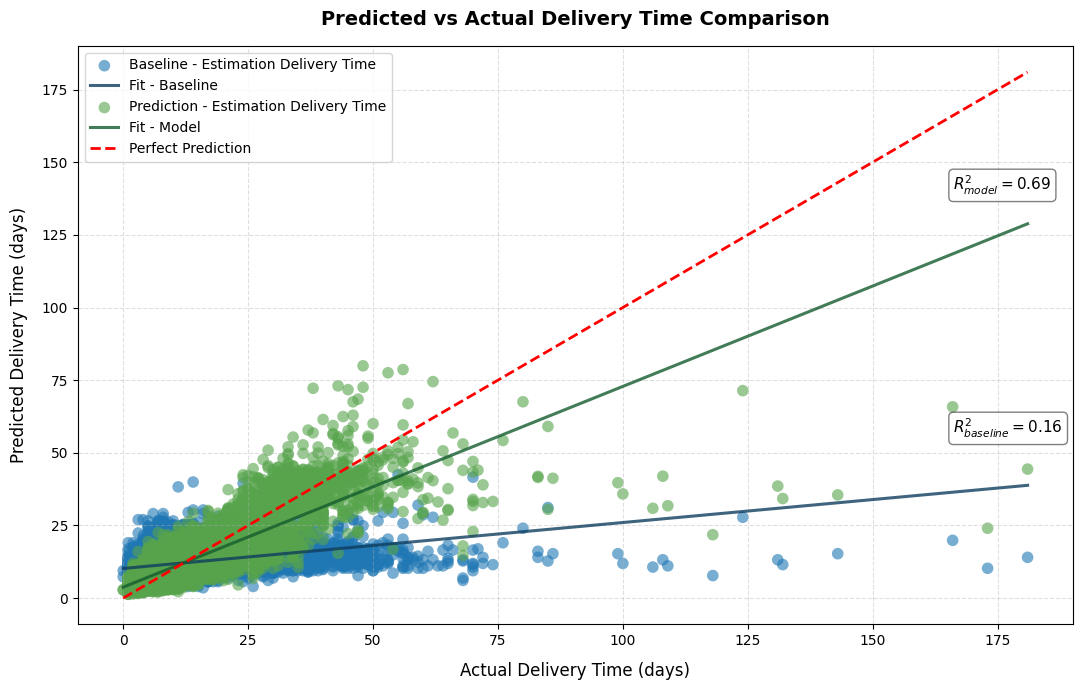

In [55]:
# Model Comparison: Predicted vs Actual Delivery Time

# 1. Baseline Linear Regression on Estimated Delivery Time
linreg = LinearRegression().fit(
    X_train_full[["estimated_delivery_time_days"]],
    y_train_full
)
y_regpred = linreg.predict(X_test[["estimated_delivery_time_days"]])
r2_base = r2_score(y_test, y_regpred)

plt.figure(figsize=(11, 7))

# Baseline Scatter: Actual vs Predicted (Linear Regression)
sns.scatterplot(
    x=y_test,
    y=y_regpred,
    color="#1f77b4",
    alpha=0.6,
    s=70,
    edgecolor="none",
    label="Baseline - Estimation Delivery Time"
)


# Regression Fit Line (Baseline)
slope_base, intercept_base, _, _, _ = stats.linregress(y_test, y_regpred)
x_line = np.linspace(y_test.min(), y_test.max(), 100)
y_line = slope_base * x_line + intercept_base
plt.plot(
    x_line,
    y_line,
    color="#0f3d5e",
    linewidth=2.2,
    alpha=0.8,
    label="Fit - Baseline"
)

# Annotate R² score (Baseline)
plt.text(
    0.88, 0.33,
    f"$R^2_{{baseline}} = {r2_base:.2f}$",
    transform=plt.gca().transAxes,
    fontsize=11,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.5)
)

# 2. Improved Model: XGBoost or Custom Predictor
slope_model, intercept_model, _, _, _ = stats.linregress(y_test, y_pred)
x_line_model = np.linspace(y_test.min(), y_test.max(), 100)
y_line_model = slope_model * x_line_model + intercept_model
r2_model = r2_score(y_test, y_pred)

# Scatter: Actual vs Predicted (Improved Model)
sns.scatterplot(
    x=y_test,
    y=y_pred,
    color="#57a44c",
    alpha=0.6,
    s=70,
    edgecolor="none",
    label="Prediction - Estimation Delivery Time"
)

# Regression Fit Line (Improved Model)
plt.plot(
    x_line_model,
    y_line_model,
    color="#145c2e",
    linewidth=2.2,
    alpha=0.8,
    label="Fit - Model"
)

# Annotate R² score (Model)
plt.text(
    0.88, 0.75,
    f"$R^2_{{model}} = {r2_model:.2f}$",
    transform=plt.gca().transAxes,
    fontsize=11,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.5)
)

# Perfect Prediction Reference Line (y = x)
lims = [
    np.min([y_test.min(), y_regpred.min()]),
    np.max([y_test.max(), y_regpred.max()])
]
plt.plot(
    lims,
    lims,
    linestyle="--",
    color="red",
    linewidth=2,
    label="Perfect Prediction"
)

plt.title(
    "Predicted vs Actual Delivery Time Comparison",
    fontsize=14,
    fontweight="bold",
    pad=15
)
plt.xlabel("Actual Delivery Time (days)", fontsize=12, labelpad=10)
plt.ylabel("Predicted Delivery Time (days)", fontsize=12, labelpad=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(fontsize=10, frameon=True, loc="upper left")
plt.tight_layout()
plt.show()

### 8.5. Feature Importance: Understanding Most Influential Features

Moving on, we extract feature importance from the trained XGBoost model to identify which factors most influence delivery time predictions. The horizontal bar plot presented illustrates each feature’s relative importance, measured by its average gain, providing a clear view of how the model makes decisions.

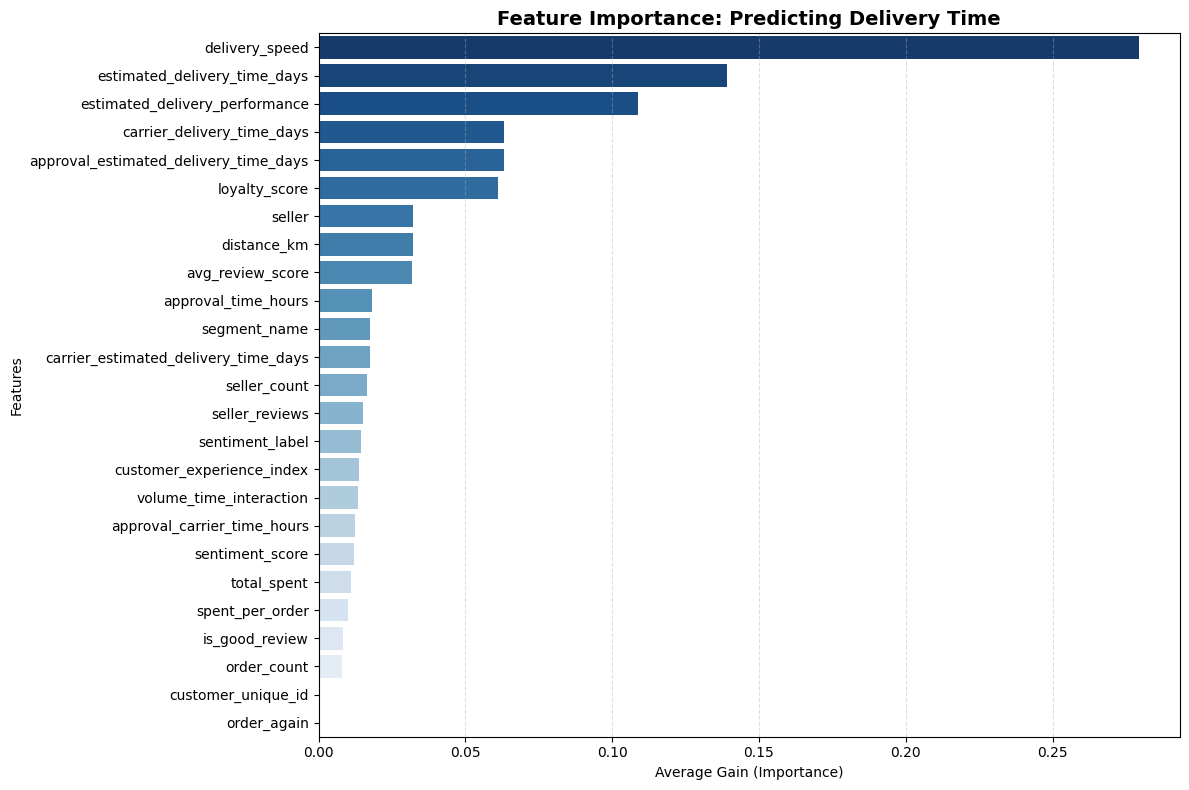

In [56]:
# Get feature importance values
importances = xgb_model.feature_importances_

# Match them with feature names
features = X.columns
fi_df = pd.DataFrame({"Feature": features, "Importance": importances})

# Sort by importance
fi_df = fi_df.sort_values("Importance", ascending=False)

# Plot with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=fi_df,
    x="Importance", 
    y="Feature", 
    palette="Blues_r"    
)
plt.title("Feature Importance: Predicting Delivery Time", fontsize=14, weight="bold")
plt.xlabel("Average Gain (Importance)")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

The top six most important features are `delivery_speed`, `estimated_delivery_time_days`, `estimated_delivery_performance`, `carrier_delivery_time_days`, `approval_estimated_delivery_time_days`, and `loyalty_score`, in that order.  

This ranking is reasonable since the first feature, `delivery_speed`, captures historical behavior by applying penalties when the system’s estimated delivery time was shorter or longer than the actual one. Similarly, `estimated_delivery_performance` reflects past performance while incorporating distance and average review score normalized by the estimated delivery time, making both strong indicators of timing accuracy. The next feature, `estimated_delivery_time_days`, represents the system’s original delivery estimate, computed as the difference between purchase and delivery dates. Then, `carrier_delivery_time_days` and `approval_estimated_delivery_time_days` capture operational aspects of the process, measuring the time from purchase to carrier pickup, and from payment approval to delivery, respectively. Finally, `loyalty_score` integrates the number of orders, average review score, and the inverse of estimated delivery time, summarizing customer consistency and satisfaction even when estimates fluctuate.

We now examine the top features. The joint plots below show the relationship between each feature and actual `delivery_time_days`, colored by customer segment, and also display the data distribution along both axes. This highlights how delivery times vary across segments, revealing key patterns, trends, and outliers.

There is a clear relationship between this feature and the target variable, as most customers received their orders within 25 days, and these were primarily *loyal, highly satisfied, and high-value (“whales”) customers*. This suggests that customers who received their orders earlier tended to report higher satisfaction. The `delivery_speed` feature, calculated by dividing the distance in kilometers between customers and sellers, computed from their latitudes and longitudes, by the system’s estimated delivery time, helps capture this effect. Consequently, satisfied customers generally show **positive** delivery speed values, whereas less satisfied customers exhibit values close to zero or **negative**. This pattern aligns with the feature’s design, where positive values indicate deliveries occurring **before** the system’s estimated date, while negative values reflect **underestimations**, when actual delivery takes longer than expected.  

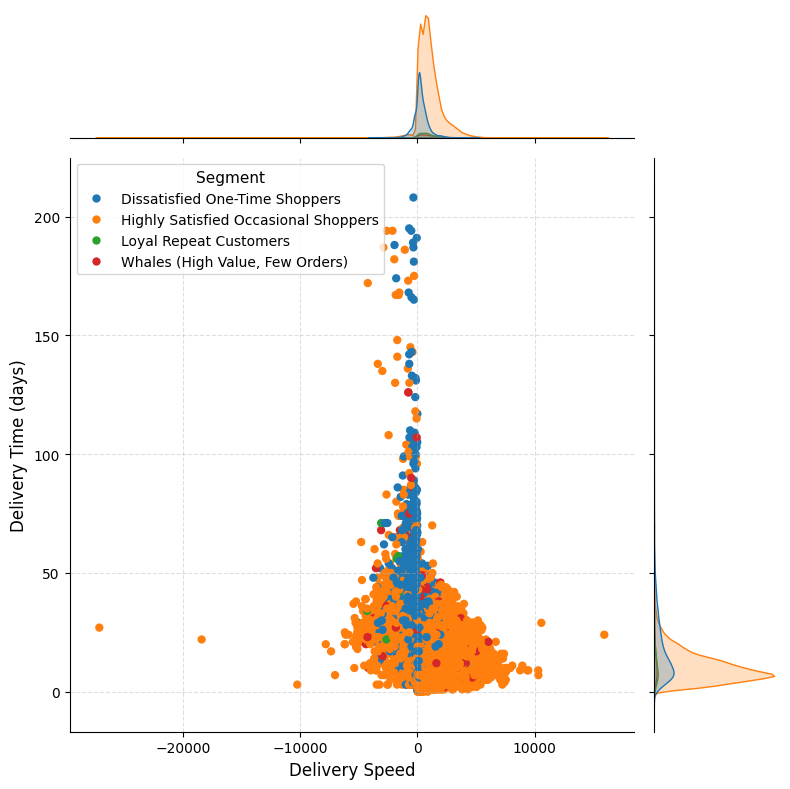

In [57]:
sns.jointplot(
    data=reviews_data,
    x="delivery_speed",
    y="delivery_time_days",
    hue="segment_name",
    height=8, 
    ratio=4, 
    edgecolor='none'
)
plt.xlabel("Delivery Speed", fontsize=12)
plt.ylabel("Delivery Time (days)", fontsize=12)
plt.legend(title="Segment", fontsize=10, title_fontsize=11, loc="upper left")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

The next feature is `estimated_delivery_time_days`, shown in the plot colored by customer segment. Estimated delivery times average around 22 days, while actual deliveries are about 12 days. Adding a red dotted line representing the ideal case where estimated equals actual delivery reveals a clear pattern: points below the line indicate that estimated delivery grows faster than actual delivery, while points above the line show actual delivery exceeding the system’s estimate, meaning that **highly satisfied** customers mostly lie below the red line, receiving orders **earlier** than **estimated**, whereas **unsatisfied** customers are mostly above it. This illustrates that customers are happier when deliveries arrive before the estimated date and dissatisfied when they arrive later.  

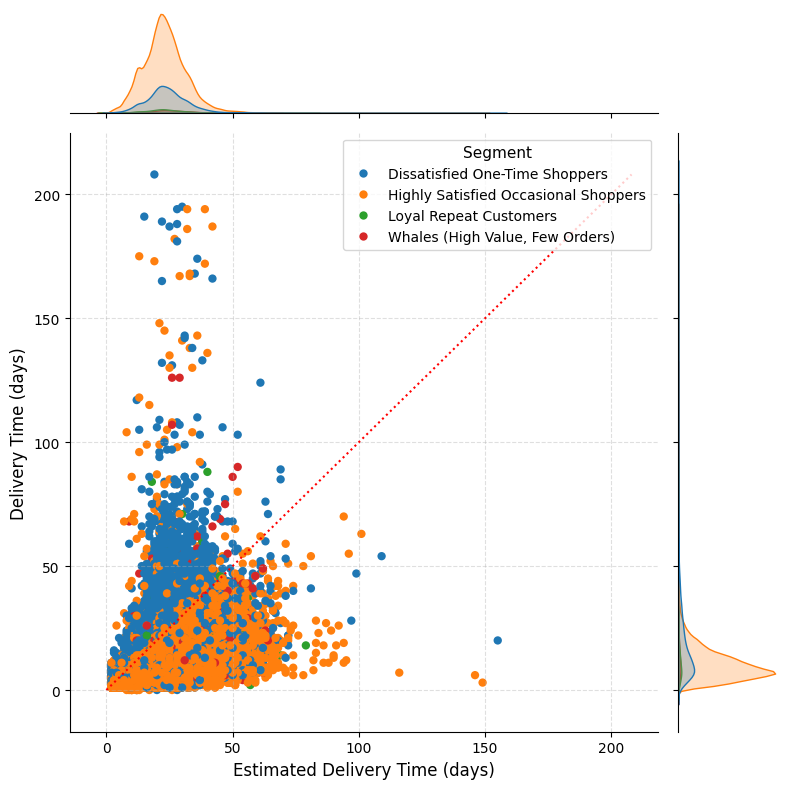

In [58]:
plot = sns.jointplot(
    data=reviews_data,
    x="estimated_delivery_time_days",
    y="delivery_time_days",
    hue="segment_name",
    height=8, 
    ratio=5, 
    edgecolor='none'
)

# Red dotted ideal line
max_val = max(reviews_data["estimated_delivery_time_days"].max(), reviews_data["delivery_time_days"].max())
plot.ax_joint.plot([0, max_val], [0, max_val], 'r:', linewidth=1.5)  # red dotted line

plt.xlabel("Estimated Delivery Time (days)", fontsize=12)
plt.ylabel("Delivery Time (days)", fontsize=12)
plt.legend(title="Segment", fontsize=10, title_fontsize=11, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


We now examine `estimated_delivery_performance`, which measures how the system’s predicted delivery time aligns with actual outcomes. The plot compares this feature with the target variable, with points colored by customer segment. Negative values indicate **overestimated deliveries**, while positive ones reflect **on-time** or **faster deliveries**. The feature’s magnitude depends on the average review score, higher values indicate greater satisfaction, and decreases with longer estimated delivery times. Most satisfied customers received their orders earlier than expected, forming a clear cluster, while a smaller group experienced late deliveries, resulting in a **bimodal distribution**. Unsatisfied customers center around zero, suggesting mixed causes of dissatisfaction. Also, deliveries beyond **25 days** are rare and mostly linked to lower satisfaction.

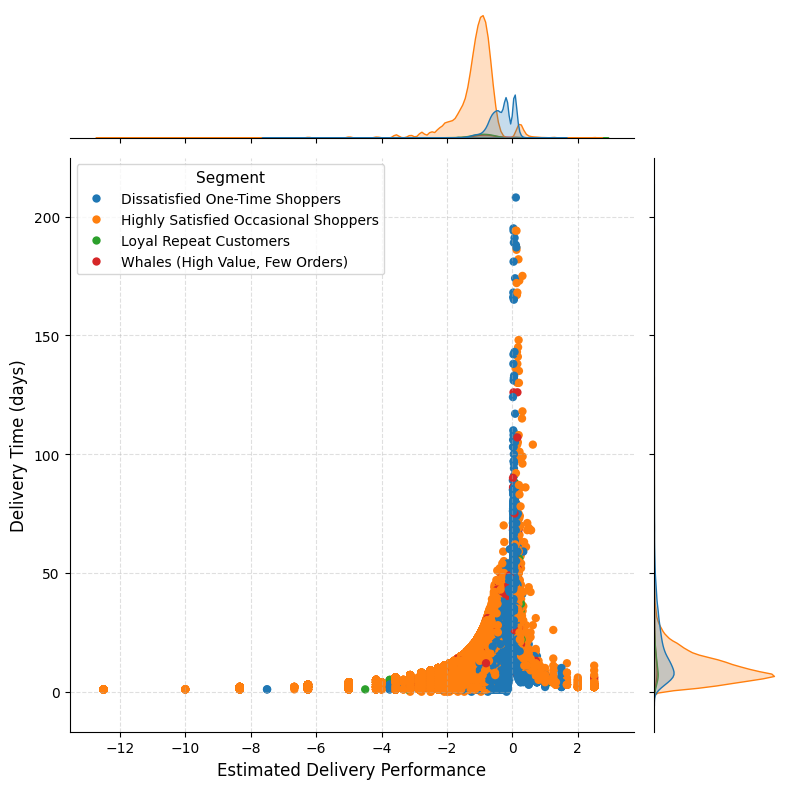

In [59]:
sns.jointplot(
    data=reviews_data,
    x="estimated_delivery_performance",
    y="delivery_time_days",
    hue="segment_name",
    height=8, 
    ratio=4, 
    edgecolor='none'
)
plt.xlabel("Estimated Delivery Performance", fontsize=12)
plt.ylabel("Delivery Time (days)", fontsize=12)
plt.legend(title="Segment", fontsize=10, title_fontsize=11, loc="upper left")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

The next feature is `carrier_delivery_time_days`, which represents the time from purchase to carrier pickup. From the plot, we can see that most products are picked up by carriers within roughly 5 days after purchase, with a mean around 3 days. However, some outliers show that pickup can take significantly longer. There is a slight tendency in this V-shaped plot for **unsatisfied** customers’ orders to be picked up slightly later, suggesting that delays in carrier pickup may contribute to lower customer satisfaction.

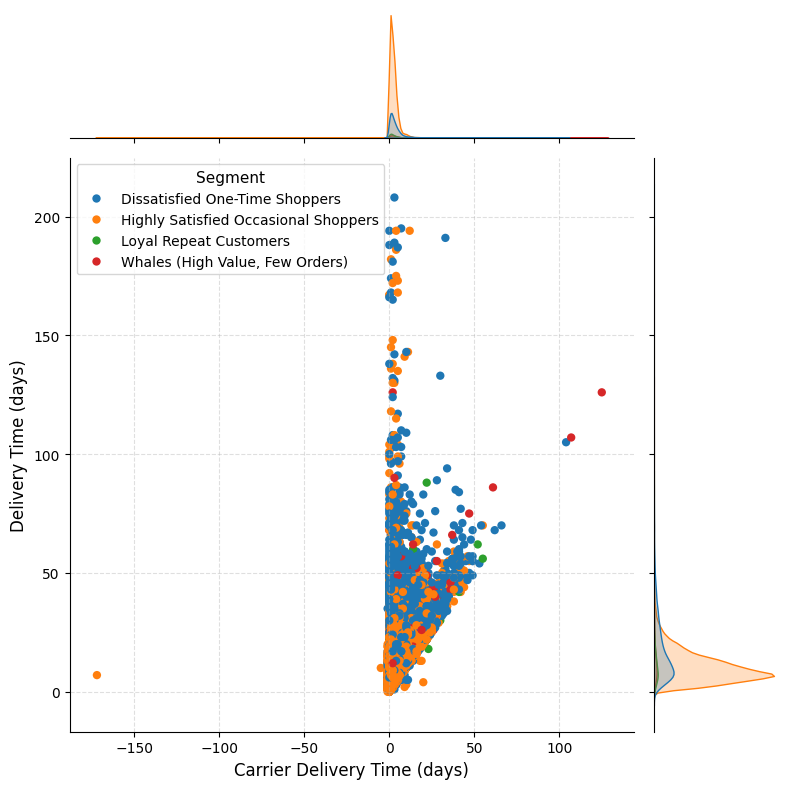

In [60]:
sns.jointplot(
    data=reviews_data,
    x="carrier_delivery_time_days",
    y="delivery_time_days",
    hue="segment_name",
    height=8, 
    ratio=4, 
    edgecolor='none'
)
plt.xlabel("Carrier Delivery Time (days)", fontsize=12)
plt.ylabel("Delivery Time (days)", fontsize=12)
plt.legend(title="Segment", fontsize=10, title_fontsize=11, loc="upper left")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

Another important feature is `approval_estimated_delivery_time_days`, which measures the time from payment approval to system-estimated delivery. The plot below shows its relationship with actual delivery time, with points colored by customer segment. The distribution is roughly bell-shaped, indicating that most orders cluster around a typical approval duration. As in previous plots, there is a clear separation between **unsatisfied** and **highly satisfied** customers, with highly satisfied customers generally receiving their deliveries earlier. Interestingly, many of these satisfied customers experience slightly longer payment approval times, although this difference aligns with the relative size of each segment. Overall, all segments have a similar mean approval time, suggesting that payment processing speed is not a major factor in customer satisfaction. However, this feature remains useful for estimating new delivery time days, likely because most orders are approved on or near the day of purchase, which also explains the similarity with the previous plot of system-estimated delivery time days.

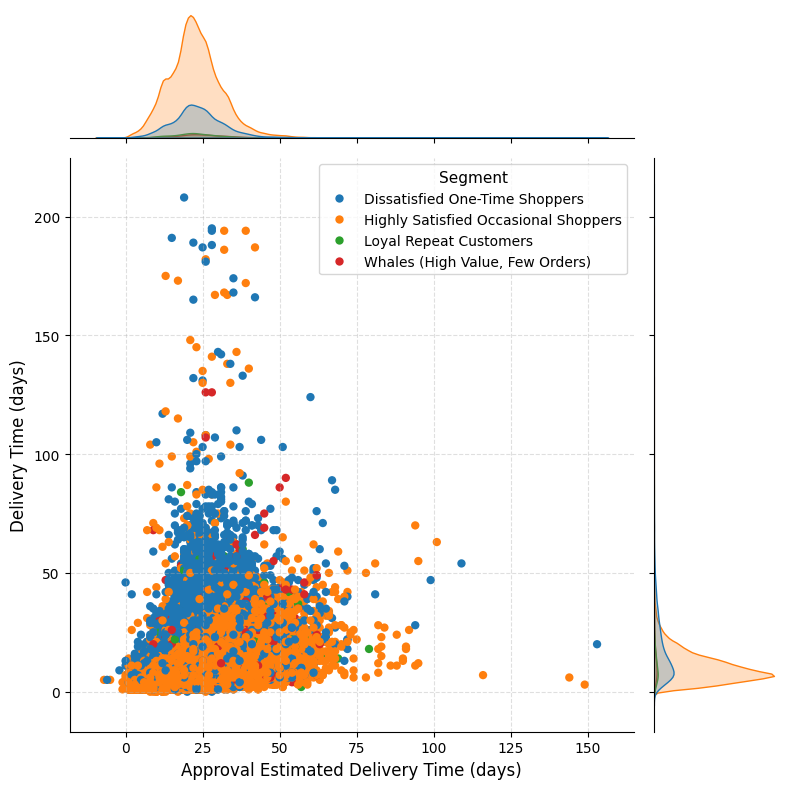

In [61]:
sns.jointplot(
    data=reviews_data,
    x="approval_estimated_delivery_time_days",
    y="delivery_time_days",
    hue="segment_name",
    height=8, 
    ratio=4, 
    edgecolor='none'
)
plt.xlabel("Approval Estimated Delivery Time (days)", fontsize=12)
plt.ylabel("Delivery Time (days)", fontsize=12)
plt.legend(title="Segment", fontsize=10, title_fontsize=11, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

The next and last visualization examines how customer loyalty relates to delivery times, showing whether higher loyalty is linked to faster deliveries or consistent performance across segments. The `loyalty_score` combines purchase frequency, review scores, and delivery efficiency, with higher values reflecting more engaged and satisfied customers. As expected, highly satisfied and loyal customers tend to have higher scores, while unsatisfied customers have lower ones. This is also reflected in the means, with the average loyalty score for satisfied customers clearly above that of unsatisfied customers, as seen in the plot.

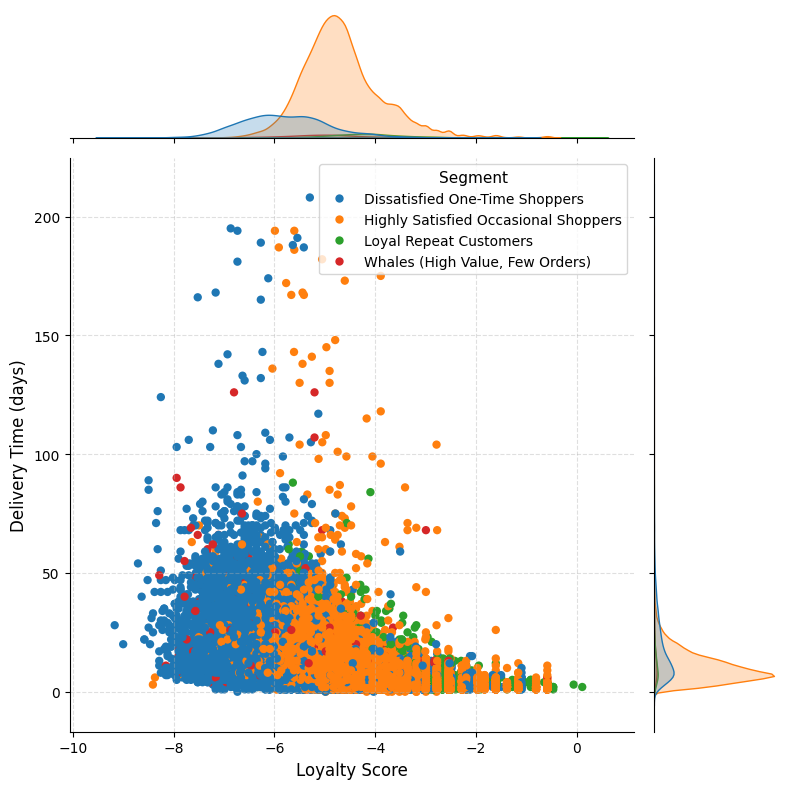

In [62]:
sns.jointplot(
    data=reviews_data,
    x="loyalty_score",
    y="delivery_time_days",
    hue="segment_name",
    height=8, 
    ratio=4, 
    edgecolor='none'
)
plt.xlabel("Loyalty Score", fontsize=12)
plt.ylabel("Delivery Time (days)", fontsize=12)
plt.legend(title="Segment", fontsize=10, title_fontsize=11, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

Finally, we integrate the new delivery time estimates into the system’s original predictions, producing `new_estimated_time_delivery_days` for each customer-seller pair. The dataset also includes `distance_km` to account for the impact of distance on delivery performance. Comparing these new estimates with actual delivery times highlights the discrepancies between system predictions and real-world outcomes, demonstrating the predictive improvements achieved using the XGBoost model.  

This enhanced estimation not only provides a more accurate view of expected delivery times but also offers multiple practical applications. For example, it can be used to update the system’s delivery time predictions in real time, improving customer transparency and satisfaction. Alternatively, it can serve as a new feature for downstream models, capturing historical order patterns, customer purchasing behavior, and satisfaction levels.  

Moreover, analyzing the differences between the original and updated estimates provides insights into operational bottlenecks, such as delays in carrier pickups or approval processes, and helps identify customer segments that are more sensitive to delivery performance. By incorporating historical data, customer behavior, and model predictions, these new estimates enable a more reliable and dynamic approach to delivery management, ultimately supporting both strategic planning and operational optimization.

In [63]:
reviews_data['new_estimated_time_delivery_days'] = np.round(xgb_model.predict(X))
updated_delivery_time = reviews_data[[
    'customer_unique_id', 'seller',
    'distance_km',
    'estimated_delivery_time_days',
    'delivery_time_days', 
    'new_estimated_time_delivery_days'
]]
updated_delivery_time.sample(10)

,customer_unique_id,seller,distance_km,estimated_delivery_time_days,delivery_time_days,new_estimated_time_delivery_days
62365,ecf30cb59f02b641f15ac50c9b1d14a4,d3674f271c91f824f82d24d92011f669,795.990188,25.0,32.0,36.0
82635,86003410d78a121c8bec4b3a57991f7c,955fee9216a65b617aa5c0531780ce60,369.680302,30.0,33.0,39.0
59974,20c28e4c9165270a2aef41f6de868ffb,4869f7a5dfa277a7dca6462dcf3b52b2,847.629754,22.0,12.0,13.0
61438,6963fcaa55875dfdc09d7faee1a6f445,cc419e0650a3c5ba77189a1882b7556a,436.793557,21.0,7.0,10.0
41844,bb67b4b0f2f84a56c0ca92111d4f9197,916c9de0b5ad957346eeeb12f332687e,88.575304,22.0,8.0,7.0
2974,9ddf8df717339b071932437af0e0f7d5,98dac6635aee4995d501a3972e047414,806.355831,18.0,9.0,9.0
85042,e5f046d49786b5b1992e0567d40a6600,9198786624eaeb375793215cad26cfa6,641.932795,33.0,17.0,18.0
53025,64bde37d045cf085cb670c5fe23f62e7,d1b65fc7debc3361ea86b5f14c68d2e2,396.482449,26.0,4.0,7.0
54237,03ffd4dd8a22ac7d1e9a70fcb717ca46,05ff92fedb5be47920fea08e501238b9,1414.312288,28.0,45.0,42.0
3443,e22c7e55a547f8d9bc30d2957ba1c9c5,5cf13accae3222c70a9cac40818ae839,826.571421,52.0,19.0,14.0


## 9. Strategic Insights and Business Impact

In this final section we summarize the key insights from our multi-model framework, highlights actionable recommendations, and discusses limitations and future enhancement opportunities. The goal is to connect our analytical results directly to business decisions and operational improvements.

### 9.1. Key Analytical Findings: Multi-Model System Performance  

Our multi-model approach integrates forecasting, customer segmentation, sentiment analysis, and delivery time prediction to generate a comprehensive understanding of operations and customer behavior.

- **Forecasting Daily Orders:**  
Using Prophet, we captured daily and seasonal patterns in historical order data from 2016–2018, enabling accurate short- to medium-term demand planning. These patterns allowed us to successfully predict daily and monthly order volumes for the following year, providing a solid foundation for operational decision-making.

- **Customer Segmentation:**  
KMeans clustering revealed four clear and informative customer segments based on spending, engagement, and satisfaction: *Highly Satisfied Occasional Shoppers*, *Dissatisfied One-Time Shoppers*, *Loyal Repeat Customers*, and *Whales* (high value, few orders). These insights help tailor strategies for marketing, logistics, and customer retention.

- **Forecasting Customer-Segmented Monthly Orders:**  
By combining the Prophet forecasts with KMeans segmentation, we extracted the monthly distribution of customer segments from the previous year and applied it to the next year’s forecasted order volumes. This approach produced detailed predictions of the number of orders per customer segment, supporting targeted planning and strategic allocation of resources.

- **Sentiment Analysis:**  
Multilingual sentiment analysis using XLM-RoBERTa on Portuguese-language customer reviews provided actionable insights into satisfaction trends. Detected sentiment patterns correlated with delivery performance and overall experience, enriching our understanding of customer satisfaction dynamics.

- **Delivery Time Estimation:**  
The XGBoost regression model significantly enhanced delivery time predictions by integrating historical order data, customer segmentation results, and sentiment analysis insights. The model revealed that past delivery performance, estimation errors (under- and over-predictions), and customer behavior patterns were among the most influential factors driving delivery outcomes.  

  The six most important predictive features were:  
  1. `delivery_speed` – calculated as the distance in kilometers between the customer and seller divided by the system’s estimated delivery time; this feature also captures historical deviations between estimated and actual delivery durations.  
  2. `estimated_delivery_time_days` – the system’s original estimated delivery time in days.  
  3. `estimated_delivery_performance` – measures historical estimation accuracy, combining distance effects with normalized customer review scores.  
  4. `carrier_delivery_time_days` – represents the time elapsed from purchase to carrier pickup.  
  5. `approval_estimated_delivery_time_days` – captures the time from payment approval to estimated delivery.  
  6. `loyalty_score` – integrates order frequency, average review rating, and delivery consistency, summarizing overall customer reliability and satisfaction.  

This model delivered substantially more accurate and stable delivery time estimates than the system baseline. **R² improved from 0.16 to 0.69**, meaning the model now explains **53% more variance**, while **RMSE decreased by approximately 5 days**, reducing discrepancies between predicted and actual delivery dates. As a result, it strengthens both operational planning and customer trust.

### 9.2. Actionable Recommendations: Logistics and Customer Experience Improvements

- **Integrate refined delivery estimates:**  
Incorporate the XGBoost-predicted delivery times into the platform’s existing system to close the gap between estimated and actual delivery durations. This adjustment should improve reliability for both customers and internal performance tracking, especially given the model’s strong feature contributions from `delivery_speed`, `estimated_delivery_performance`, and `loyalty_score`.  

- **Adopt segment-based operational planning:**  
Use the combined outputs from Prophet forecasts and KMeans segmentation to anticipate next year's monthly order volumes per customer segment. These insights can inform staffing, inventory management, and routing decisions prioritizing “Loyal Repeat Customers” and “Whales,” who represent the most valuable and predictable segments.  

- **Enhance delivery monitoring through feature tracking:**
Add the key XGBoost operational features `carrier_delivery_time_days`, `approval_estimated_delivery_time_days`, and delivery delays to a live dashboard. Tracking them continuously can flag delays or slowdowns early and help the operations team intervene faster.  
 
- **Leverage sentiment-driven quality control:**  
Sentiment analysis findings can be integrated into customer service and logistics workflows. Negative sentiment clusters often align with delivery performance issues; flagging and addressing them can improve satisfaction and retention, particularly among “Dissatisfied One-Time Shoppers.”  

- **Enable dynamic, data-informed logistics:**  
Combine the time-series daily forecasts with real-time tracking to adjust to short-term demand fluctuations. This integration allows the system to anticipate spikes in orders, reallocate carriers, and dynamically adjust delivery expectations for different customer segments.

### 9.3. Project Limitations and Future Enhancement Opportunities  

- **Data limitations:**  
  Some historical order and delivery records are incomplete or inconsistent, which can affect model accuracy and reduce confidence in predictions for certain segments or periods.  

- **Forecasting horizon:**  
  Prophet works well for short- to medium-term predictions, but long-term trends may require additional data or alternative modeling approaches to maintain accuracy.  

- **Sentiment scope:**  
  Our sentiment analysis focused on Portuguese-language reviews. Expanding to other languages or channels (e.g., social media) could provide a more complete view of customer satisfaction.

- **Integration complexity:**  
  Deploying a real-time multi-model system involves engineering challenges, including automated retraining, API integration, and syncing multiple data streams.  

**Future enhancement opportunities:**  

- Add real-time order and delivery data to enable dynamic, up-to-date predictions.  
- Expand sentiment analysis to multiple languages and new platforms to better capture customer feedback.  
- Experiment with advanced forecasting models or ensemble approaches to improve accuracy over longer horizons.  
- Incorporate external factors such as traffic, weather, and operational costs into the prediction pipeline for more robust delivery and resource planning.  

### 9.4. Final Remarks  

This project shows the value of a unified, data-driven ecosystem for e-commerce, combining forecasting, customer segmentation, sentiment analysis, and delivery time estimation to link analytics with decision-making. The models give a clear picture of customer behavior, demand patterns, and delivery performance, enabling more accurate delivery, smarter resource allocation, and improved customer satisfaction.  

By integrating refined delivery estimates, segment-based planning, and real-time monitoring, logistics operations become more adaptive and responsive. While limitations such as data gaps, short forecasting horizons, and integration challenges exist, they also point to clear opportunities for improvement. Future enhancements, including real-time data integration, multilingual sentiment analysis, and automated retraining pipelines, can boost both scalability and system resilience.

Overall, this framework lays the foundation for a predictive system that supports faster, data-driven decisions, strengthens operations, and drives strategic growth while enhancing the customer experience.  